Supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [61]:
# o1.R=[6000,0,0]
# o1.V=[0,5,20]
# o1.P=6000
o1.e=.9999999999
o1.a=1e14
# o1.omega = 100
describe_orbit(o1)
print('P:',o1.P)

Updated R and V
Updated R and V
Updated P
a    1.000000e+14
e    1.000000e+00
i    7.596376e+01
Ω    1.500000e+02
ω    1.000000e+02
ν    5.000000e+01
dtype: float64 

             x            y            z
R  8392.638790 -6550.253357  5905.465653
V     6.303418    -2.339423    -4.502836
P: 9.95201956579298e+18


In [63]:
norm(o1.V)

8.092064551002604

a    28666.438356
e        0.706974
i       53.130102
Ω        0.000000
ω        0.000000
ν        0.000000
dtype: float64 

      x    y    z
R  8400  0.0  0.0
V     0  5.4  7.2


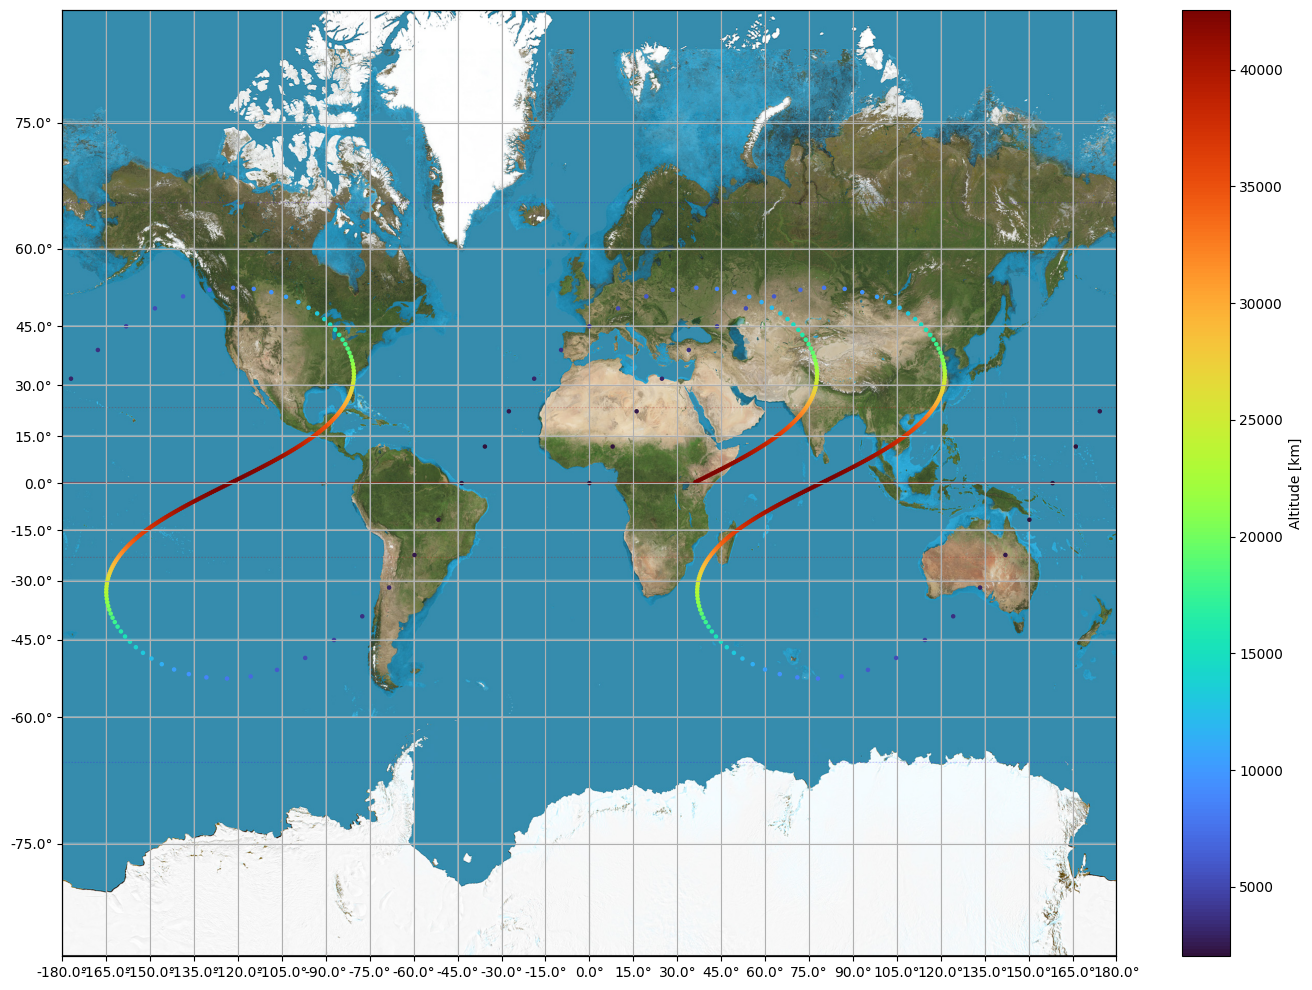

In [9]:
# from orbits import *
R=[8400,0,0]
V=[0,5.4,7.2]
o1 = orbit(R=R,V=V)
describe_orbit(o1)
space().plot_ground_track(o1,t=2.5*o1.P,dt=2.5*o1.P/500,time=True,alt=True,figsize=(14,10),facecolor='white',dpi=100,cmap='turbo')

# V & R -> COE

In [47]:
R=[8000,0,0]    #[km]
V=[0.1,-7,0]    #[km/s]

mu=398600    #[km^3/s^2]

# #Constants:
# G=6.67e-11      #[N m^2/kg^2]

In [48]:
import numpy as np
from numpy.linalg import norm

def ang_bet(A,B):
    return np.arccos(np.clip(np.dot(A,B)/(norm(A)*norm(B)), -1.0, 1.0))
for var in ['r','v','epsilon','a','E','e','H','h','i','N','n','Omega','omega','f']:
    globals().pop(var, None);

R=np.array(R)
V=np.array(V)
r=norm(R)
v=norm(V)
epsilon = v**2/2-mu/r
a=-mu/(2*epsilon)
E=1/mu*((v**2-mu/r)*R-sum(R*V)*V)
e=norm(E)
H=np.cross(R,V)         #vector of h
# h=norm(H)
i=np.rad2deg(ang_bet([0,0,1],H))
N=np.cross([0,0,1],H)   #vector of n
if norm(N)==0: N=np.array([1,0,0])
# n=norm(N)
Omega=np.rad2deg(ang_bet([1,0,0],N))
if N[1]<0: Omega=(360-Omega)%360
if e==0:
    omega=0
    E=N
else:
    omega=np.rad2deg(ang_bet(N,E))
#     if E[2]<0: omega=360-omega            ####### NOT WORKING FOR i=0
#     if sum(E*np.cross([0,0,1],N))<0: omega=360-omega  ##### NOT WORKING FOR i=180
    if sum(E*np.cross(H,N))<0: omega=360-omega 
f=np.rad2deg(ang_bet(E,R))
if sum(R*V)<0: f=360-f

In [49]:
import pandas as pd
results = pd.Series([a,e,i,Omega,omega,f],index=['a','e','i','Ω','ω','ν'])
print(results)

a    7871.248025
e       0.021715
i     180.000000
Ω       0.000000
ω     220.314100
ν     139.685900
dtype: float64


# COE -> V & R

In [136]:
a=6353.715991    #[km]
e=0.204749
e=0
i=8.637711    #[°]
Omega=13.284866    #[°]
omega=219.077401    #[°]
f=129.970497    #[°]
# f=[1,2,3,4,5]

mu=398600    #[km^3/s^2]

In [137]:
i=np.deg2rad(i)
Omega=np.deg2rad(Omega)
omega=np.deg2rad(omega)
f=np.deg2rad(f)

In [138]:
R=0

In [140]:
import numpy as np
from numpy.linalg import norm

for var in ['R','r','V','v','epsilon','E','H','h','N','n']:
    globals().pop(var, None);
    
f = np.array(f)
T_i=np.array([[1,0,0],
              [0,np.cos(i),-np.sin(i)],
              [0,np.sin(i),np.cos(i)]])
T_Omega=np.array([[np.cos(Omega),-np.sin(Omega),0],
                  [np.sin(Omega),np.cos(Omega),0],
                  [0,0,1]])
T_mat=np.matmul(T_Omega,T_i)
r=a*(1-e**2)/(1+e*np.cos(f))
v=np.sqrt(mu*(2/r-1/a))
l=omega+f
R=np.transpose(r*T_mat.dot(np.array([np.cos(l),np.sin(l),np.zeros_like(f)])))
##
rp=a*(1-e**2)/(1+e*np.cos(f))**2*e*np.sin(f)    #dr/df
# V=np.array([(v**2-rp**2)**(1/2),rp,0])
V=np.array([np.cos(l)*rp-np.sin(l)*r,
            np.sin(l)*rp+np.cos(l)*r,
            np.zeros_like(f)])
V=V/norm(V)*v
# V=np.array([[1,0,0],
#             [0,np.cos(i),-np.sin(i)],
#             [0,np.sin(i),np.cos(i)]]).dot(V)
# V=np.array([[np.cos(Omega),-np.sin(Omega),0],
#             [np.sin(Omega),np.cos(Omega),0],
#             [0,0,1]]).dot(V)
V=np.transpose(T_mat.dot(V))

In [142]:
print('R:',R)
print('V:',V)

R: [6345.30432886  271.94155307 -181.29440205]
V: [-0.30212318  7.82813509  1.1678887 ]


In [90]:
norm(R,axis=1)

array([6353.715991, 6353.715991, 6353.715991, 6353.715991, 6353.715991])

In [68]:
display(T_mat)
display(r)
display(v)
display(l)

array([[ 0.9732396 , -0.22718631,  0.03451166],
       [ 0.22979268,  0.96220087, -0.14616705],
       [ 0.        ,  0.15018609,  0.98865775]])

array([5052.92978786, 5053.32216556, 5053.97613098, 5054.89168794,
       5056.06884166])

array([9.74858521, 9.74795687, 9.74690977, 9.74544407, 9.74356005])

array([3.84107526, 3.85852855, 3.87598184, 3.89343513, 3.91088843])

In [55]:
# earth=planet(M=5.98e24)
earth=planet(mu=398600)
print(earth.mu)
print(earth.M)
print(earth.R)

398600
5976011994002999.0
0


https://upload.wikimedia.org/wikipedia/commons/f/f4/Mercator_projection_SW.jpg

From 82°S to 82°N

# CLASS AND IMPORTANT STUFF

In [23]:
import numpy as np
from numpy.linalg import norm
from scipy.optimize import fsolve#, root
import warnings

class InitError(Exception):
    pass

# def supp_warnings(func):
#     """
#     Deccorator to suppress warnings given by the function.
#     """
#     with warnings.catch_warnings():
#         warnings.simplefilter("ignore")
#         func()

def ang_bet(A,B):
    return np.arccos(np.clip(np.dot(A,B)/(norm(A)*norm(B)), -1.0, 1.0))

# def proj_on(V_i,*args): ### For orthogonal basis only
#     V_proj = 0
#     for v in args:
#         V_proj += np.dot(V_i,v)/np.dot(v,v)*v
#     return V_proj

# def proj_on(V_i,*args,comb=False):
#     raise NotImplemented("Does not work.")
#     array2 = np.vstack([args]).T
#     if len(args)>np.linalg.matrix_rank(array2): raise ArithmeticError('Vectors in args must be linearly independant.')
#     array = np.vstack([args,V_i]).T
#     for i in range(np.shape(array)[1]-1):
#         if array[i,i]==0:
#             for j in range(i+1,np.shape(array)[0]):
#                 if array[j,i]!=0:
#                     array[i,:],array[j,:]=array[j,:],array[i,:]
#                     break
#             else: return array
#         array[i,:]=array[i,:]/array[i,i]
#         for j in range(i+1,np.shape(array)[0]):
#             array[j,j]
#             array[j,:]=array[j,:]-array[i,:]/array[i,i]*array[j,i]
#     for i in range(np.shape(array)[1]-2,-1,-1):
#         if array[i,i]==0: continue
#         for j in range(i):
#             array[j,:]=array[j,:]-array[i,:]/array[i,i]*array[j,i]
#     if comb: return array[:len(args),-1]
#     return array2.dot(array[:len(args),-1])

# def proj_on(V_i,*args):
# #     print(V_i,args)
#     array2 = np.vstack([args]).T
#     if len(args)>np.linalg.matrix_rank(array2): raise ArithmeticError('Vectors in args must be linearly independant.')
#     if len(V_i)==np.linalg.matrix_rank(array2): return V_i
#     if len(args)==1 or all(map(lambda x,y: np.dot(x,y)==0, args[:-1],args[1:])): o_args = args
#     else:
#         o_args = [args[0]]
#         for i in range(1,len(args)):
#             o_args.append(args[i]-proj_on(args[i],*o_args))
#     V_proj = 0
#     for v in o_args:
# #         print(type(v),v)
#         V_proj += np.dot(V_i,np.array(v))/np.dot(np.array(v),np.array(v))*np.array(v)
#     return V_proj

def proj_on(V_i,*args):
    array_args = np.vstack([args]).T
    if len(args)>np.linalg.matrix_rank(array_args): raise ArithmeticError('Vectors in args must be linearly independant.')
#     if len(V_i)==np.linalg.matrix_rank(array_args): return V_i
    ortho_args = np.linalg.qr(array_args)[0].T
    return ortho_args @ V_i @ ortho_args

def s2hms(st):
    s=st%60
    st=st//60
    m=int(st%60)
    h=int(st//60)
    return h,m,s

def hms2s(h,m,s):
    return h*3600+60*m+s

import pandas as pd
def describe_orbit(o1):
    print(pd.Series(o1.coe(),index=['a','e','i','Ω','ω','ν']),'\n')
    print(pd.DataFrame(list(o1.rv()),index=['R','V'],columns=['x','y','z']))

class planet:
    def __init__(self,mu=None,M=None,R=0,X=0,Y=0):
        self._G=6.67e-11
        if mu is not None:
            self.mu=mu
            if M is not None: self.M=M
            else: self.M=mu/self._G
        elif M is not None:
            self.M=M
            if mu is not None: self.mu=mu
            else: self.mu=M*self._G
        else: raise InitError("Missing information: mu and M undefined")
        self.R=R
        self.X=X
        self.Y=Y

# class attr_with_last: # Not quite working
#     def __get__(self, instance, owner=None):
#         return self.value
#     def __set__(self, instance, value):
#         self.last = self.value
#         self.value = value
#     def set_last(self):
#         self.value = self.last

# class flag: # Working but long and unnecessary
#     """
#     Class descriptor for flags of boolean values with a few additional methods of remembering last and negating itself inplace
#     """
#     def __init__(self,value): self.truth = bool(value)
#     def __bool__(self): return self.truth
#     def __repr__(self): return str(self.truth)
#     def __eq__(self, other): return self.truth == other
#     def __lt__(self, other): return self.truth < other
#     def __le__(self, other): return self.truth <= other
#     def __ne__(self, other): return self.truth != other
#     def __gt__(self, other): return self.truth > other
#     def __ge__(self, other): return self.truth >= other
#        
#     def __set__(self, instance, value):
#         self.last = self.truth
#         self.truth = bool(value)
#         print('Setted with flag')
#    
#     def set_last(self):
#         self.truth = self.last
#    
#     def flip(self):
#         self.last = self.truth
#         self.truth = not(self.truth)

class orbit:
    def __setattr__(self,name,value):
        super(orbit, self).__setattr__(name, value)
        if self._update_elements and name != '_update_elements':
            self._update_elements = False
            self._regulate()
            if name == 'P':
                self._regulate()
                self.a=((self.P/(2*np.pi))**2*self.mu)**(1/3)
                if self.update_message: print('Updated a')
            if name in ['a','e','i','Omega','omega','f','P']:
                self.R,self.V=space().calc_rv(*self.coe(),self.mu)
                if self.update_message: print('Updated R and V')
            if name in ['R','V']:
                self.a,self.e,self.i,self.Omega,self.omega,self.f=space().calc_coe(*self.rv(),self.mu)
                self.P=2*np.pi*(self.a**3/self.mu)**(1/2)
                if self.update_message: print('Updated COE')
            if name == 'a':
                self.P=2*np.pi*(self.a**3/self.mu)**(1/2)
                if self.update_message: print('Updated P')
            self._update_elements = True
    
    @property
    def mu(self):
        return self._mu
    
    def __init__(self,a=7000,e=0,i=0,Omega=0,omega=0,f=0,R=None,V=None,P=None,mu=398600):
        self._update_elements = False
        self.update_message = True
        self._mu=mu
        if R is not None and V is not None:
            self.R=R
            self.V=V
            self.a,self.e,self.i,self.Omega,self.omega,self.f=space().calc_coe(R,V,mu)
            self.P=2*np.pi*(self.a**3/mu)**(1/2)
        elif R is not None or V is not None:
            raise InitError("R or V undefined.")
        else:
            if P is not None:
                self.P=P                                #[s]
                self.a=((self.P/(2*np.pi))**2*self.mu)**(1/3)
            else:
                self.a=a
                self.P=2*np.pi*(self.a**3/mu)**(1/2)    #[s]
            self.e=e
            self.i=i
            self.Omega=Omega
            self.omega=omega
            self.f=f
            self.R,self.V=space().calc_rv(a,e,i,Omega,omega,f,mu)
        self._update_elements = True
        self._regulate()
    
    def __hash__(self):
        return hash(self.coe())
        
    def __eq__(self,other):
        if isinstance(other, type(self)): return all(np.isclose(self.coe(),other.coe()))
        return False
    
    def __ne__(self,other):
        return not(self==other)
    
    def __len__(self):
        return 1
    
    def __iter__(self):
        self._itered = False #For using orbit as iterator
        return self
    
    def __next__(self):
        if self._itered: raise StopIteration
        self._itered = True
        return self
    
    def _regulate(self):
        restore_update_elements = self._update_elements
        self._update_elements = False
#         assert self.a>0, "Negative semi-major axis not supported yet"
        assert self.e>=0, "Invalid excentricity: %s"%(self.e)
#         assert self.e<1, "Orbit is not closed; excentricity > 1"
#         self.i=(self.i+90)%180-90
        if self.i<0: self.Omega=self.Omega+180
        self.i=np.rad2deg(np.arccos(np.cos(np.deg2rad(self.i))))
        self.Omega%=360
        self.omega%=360
        self.f%=360
        self._update_elements = restore_update_elements
    
    def coe(self):
        return self.a,self.e,self.i,self.Omega,self.omega,self.f
    
    def rv(self):
        return self.R,self.V
    
    def copy(self):
        copied = orbit()
        copied.__dict__ = self.__dict__.copy()
#         copied = orbit(*self.coe(),mu=self.mu)
#         copied._update_elements = self._update_elements
#         copied.update_message = self.update_message
        return copied
    
    def update(self,a=None,e=None,i=None,Omega=None,omega=None,f=None,R=None,V=None,P=None):
        restore_update_elements = self._update_elements
        self._update_elements = False
        if P is not None and a is None: a=((P/(2*np.pi))**2*self.mu)**(1/3)
        keys1={'a':a,'e':e,'i':i,'Omega':Omega,'omega':omega,'f':f}
        keys2={'R':R,'V':V}
        if any([x is not None for x in keys1.values()]):
            for x in keys1.keys():
                if keys1[x] is not None:
                    setattr(self,x,keys1[x])
#                     self.__dict__[x]=keys1[x]
            self._regulate()
            self.R,self.V=space().calc_rv(self.a,self.e,self.i,self.Omega,self.omega,self.f,mu=self.mu)
            self.P=2*np.pi*(self.a**3/self.mu)**(1/2)
        elif any([x is not None for x in keys2.values()]):
            for x in keys2.keys():
                if keys2[x] is not None:
                    setattr(self,x,keys2[x])
#                     self.__dict__[x]=keys2[x]
            self.a,self.e,self.i,self.Omega,self.omega,self.f=space().calc_coe(self.R,self.V,self.mu)
            self.P=2*np.pi*(self.a**3/self.mu)**(1/2)
        self._update_elements = restore_update_elements
        return self
    
    def dV(self,dV):
        return self.update(V=self.V/norm(self.V)*dV+self.V)
    
    @property
    def E(self):
        e=self.e
        f=np.deg2rad(self.f)
        E=np.arccos((e+np.cos(f))/(1+e*np.cos(f)))
        if f>np.pi: E=2*np.pi-E
        return np.rad2deg(E)
    
    ## Make set methods for E and M
    
    @property
    def M(self):
        e=self.e
        E=np.deg2rad(self.E)
        return np.rad2deg(E-e*np.sin(E))
    
    @property
    def ap(self):
        return self.a*(1+self.e)
    
    @property
    def pe(self):
        return self.a*(1-self.e)

##############################################################################

class space:
    def __init__(self):
        pass
    
    def calc_coe(self,R,V,mu):
        R=np.array(R)
        V=np.array(V)
        r=norm(R)
        v=norm(V)
        epsilon = v**2/2-mu/r
        a=-mu/(2*epsilon)
        E=1/mu*((v**2-mu/r)*R-sum(R*V)*V)
        e=norm(E)
        H=np.cross(R,V)         #vector of h
#         h=norm(H)
        i=np.rad2deg(ang_bet([0,0,1],H))
        N=np.cross([0,0,1],H)   #vector of n
        if norm(N)==0: N=np.array([1,0,0])
#         n=norm(N)
        Omega=np.rad2deg(ang_bet([1,0,0],N))
        if N[1]<0: Omega=(360-Omega)%360
        if e==0:
            omega=0
            E=N
        else:
            omega=np.rad2deg(ang_bet(N,E))
#             print(E,H,N)
#             if E[2]<0: omega=360-omega            ####### NOT WORKING FOR i=0
#             if sum(E*np.cross([0,0,1],N))<0: omega=360-omega  ##### NOT WORKING FOR i=180
            if sum(E*np.cross(H,N))<0: omega=360-omega ### E.(H x N)
        f=np.rad2deg(ang_bet(E,R))
        if sum(R*V)<0: f=360-f
#         print(N)
#         print(E)
#         print(R)
        return a,e,i,Omega,omega,f
    
    def calc_rv(self,a,e,i,Omega,omega,f,mu):
        i=np.deg2rad(i)
        Omega=np.deg2rad(Omega)
        omega=np.deg2rad(omega)
        f=np.deg2rad(f)
        T_i=np.array([[1,0,0],
              [0,np.cos(i),-np.sin(i)],
              [0,np.sin(i),np.cos(i)]])
        T_Omega=np.array([[np.cos(Omega),-np.sin(Omega),0],
                          [np.sin(Omega),np.cos(Omega),0],
                          [0,0,1]])
        T_mat=np.matmul(T_Omega,T_i)
        r=a*(1-e**2)/(1+e*np.cos(f))
        v=np.sqrt(mu*(2/r-1/a))
        l=omega+f
        R=np.transpose(r*T_mat.dot(np.array([np.cos(l),np.sin(l),np.zeros_like(f)])))
        rp=a*(1-e**2)/(1+e*np.cos(f))**2*e*np.sin(f)    #dr/df
        V=np.array([np.cos(l)*rp-np.sin(l)*r,
                    np.sin(l)*rp+np.cos(l)*r,
                    np.zeros_like(f)])
        V=V/norm(V)*v
        V=np.transpose(T_mat.dot(V))
        return(R,V)
        
    def predict(self,orbit,t,rv=True):
        t%=orbit.P
        e=orbit.e
#         f=np.deg2rad(orbit.f)
#         E=np.arccos((e+np.cos(f))/(1+e*np.cos(f)))
#         if f>np.pi: E=2*np.pi-E
# #         print('E=',E)
#         M=E-e*np.sin(E)
# #         print('M=',M)
        M=np.deg2rad(orbit.M)
        n=2*np.pi/orbit.P
        M=(M+n*t)%(2*np.pi)
        E=M
        iterations = 6
        for i in range(iterations): E-=(E-e*np.sin(E)-M)/(1-e*np.cos(E))
        f=np.arccos((np.cos(E)-e)/(1-e*np.cos(E)))
        if E>np.pi: f=2*np.pi-f
        f=np.rad2deg(f)
        if rv: return orbit.copy().update(f=f).rv()
        return f

    def ground_track_pos(self,orbit,t,t_0=0,dt=None,time=True):
        if dt is None: dt=t/1000
        if not(time):
            T=np.arange(orbit.f,orbit.f+t,dt)
            o2=orbit.copy()
            pos_cart=np.vstack(list(map(lambda x: o2.update(f=x).R,T)))
            T = (np.array(list(map(lambda x: o2.update(f=x).M,T)))-orbit.M)%360/(360/orbit.P)+(T-orbit.f)//360*orbit.P
        else:
            T=np.arange(t_0,t,dt)
            pos_cart=np.vstack(list(map(lambda x: self.predict(orbit,x,rv=True)[0],T)))
        
        lon = (np.rad2deg(np.arctan2(pos_cart[:,1],pos_cart[:,0]))-T*360/86164.0905+180)%360-180
#         lon-=lon[0]
        lat = 90-np.rad2deg(np.arctan2((pos_cart[:,0]**2+pos_cart[:,1]**2)**(1/2),pos_cart[:,2]))
        r = (pos_cart[:,0]**2+pos_cart[:,1]**2+pos_cart[:,2]**2)**(1/2)
        return lon,lat,r
    
    def collision_detect(self,orbit,R,time=True):
        if orbit.pe>R: return None
        if norm(orbit.R)<R: return 0
        f=360-np.rad2deg(np.arccos((orbit.a*(1-orbit.e**2)/R-1)/orbit.e))
        if not time: return f
        return (orbit.copy().update(f=f).M-orbit.M)/(360/orbit.P)
    
#############################
    def plot_ground_track(self,orbit,t,t_0=0,dt=None,time=True,background=True,R=6371,alt=False,collide_end=False,savefig=None,title=None,xgrid_step=15,ygrid_step=15,vbox=[[-180,-82],[180,82]],cmap='jet',**kwargs):
        if collide_end:
            collide = self.collision_detect(orbit,R,time=time)
            if collide is not None:
                if collide == 0: raise Exception('Collision detection: Object is already in the ground')
                if time: t = min(t,collide)
                else: t = min(t,(collide-orbit.f)%360)
        if not alt: R=0
        lon,lat,r=self.ground_track_pos(orbit=orbit,t=t,t_0=t_0,dt=dt,time=time)
        
        if vbox!=[[-180,-82],[180,82]]: background=False    #Background with changes of dimensions is not currently supported

        lon_range = [vbox[0][0],vbox[1][0]]
        lat_range = [vbox[0][1],vbox[1][1]]
        
        fig = plt.figure(**kwargs)
        ax = fig.add_subplot(111)
        if background:
            try:
                img = mpimg.imread('Earth mercator projection.jpg',format='jpg')
                ax.imshow(img, extent=(-181,181,np.deg2rad(-82.5),np.deg2rad(82.7)),aspect='auto')
            except:
                try:
                    img = mpimg.imread('https://upload.wikimedia.org/wikipedia/commons/f/f4/Mercator_projection_SW.jpg',format='jpg')
                    ax.imshow(img, extent=(-181,181,np.deg2rad(-82.5),np.deg2rad(82.7)),aspect='auto')
                except: pass
        ax.set_ylim((np.deg2rad(lat_range)))
        # ax.yaxis.clear()
        ax.yaxis._visible=False
        # ax.tick_params(left=False,labelleft=False)
        ax.grid(axis='x')
        ax=ax.twinx()
        ax.yaxis.tick_left()
        ax.set_yscale('mercator')
        # ax.set_title('a=%s km, e=%s, i=%s°, Ω=%s°, ω=%s°, ν=%s°'%(o1.coe()))
        # ax.set_title('R=%s km, V=%s km/s'%(o1.rv()))
        ax.set_title(title)
        scat = ax.scatter(lon[r>R],np.deg2rad(lat[r>R]),s=5,c=r[r>R]-R,cmap=cmap)
        cbar = fig.colorbar(scat)
        if alt: cbar.ax.set_ylabel('Altitude [km]')
        else: cbar.ax.set_ylabel('R [km]')
        ax.scatter(lon[r<R],np.deg2rad(lat[r<R]),s=5,c='black')
        ax.set_xlim(lon_range)
        ax.set_ylim((np.deg2rad(lat_range)))
        ax.grid(axis='y')
        fmt = FuncFormatter(
            lambda x, pos=None: f"{x:.1f}\N{DEGREE SIGN}")
        ax.xaxis.set(major_locator=FixedLocator(np.arange(-180, 181, xgrid_step)),
                         major_formatter=fmt, minor_formatter=fmt)
        
        fmt = FuncFormatter(
            lambda x, pos=None: f"{np.degrees(x):.1f}\N{DEGREE SIGN}")
        ax.yaxis.set(major_locator=FixedLocator(np.radians(np.arange(-90, 90, ygrid_step))),
                 major_formatter=fmt, minor_formatter=fmt)
        
        
        fig.tight_layout()
        if savefig is not None: fig.savefig(savefig)
        
        plt.show()
##########################################################
    def plot3d_orbit(self,orbs,R=6371,res=100,faces=20,planet_color=[0,.25,0],vscale=1e3,proj='ortho'):
#         raise NotImplementedError('plot3d_orbit not implemented.')
        assert R>=0, 'Planet radius must be positive'
        
        f=np.linspace(0,360,res)

        phi = np.linspace(0,2*np.pi,faces+1)
        rho = np.linspace(0,np.pi,faces+1)
        phi,rho=np.meshgrid(phi,rho)
        X=np.sin(rho)*np.cos(phi)*R
        Y=np.sin(rho)*np.sin(phi)*R
        Z=np.cos(rho)*R
#         [X,Y,Z]=sphere(args.faces);
#         hold off
#         surf(X*R,Y*R,Z*R,np.repmat(np.reshape(planet_color,1,1,[]),np.shape(X,1),np.shape(X,2)))
        fig = plt.figure(figsize=(10,10))#,dpi=80)
        ax = Axes3D(fig,auto_add_to_figure=False)
        fig.add_axes(ax)
#         ax = fig.add_subplot(projection='3d')
#         ax.plot_surface(X,Y,Z,color=planet_color,edgecolor='black',rstride=1,cstride=1,shade=False)
        ax.plot_wireframe(X,Y,Z,colors=planet_color,rstride=1,cstride=1)
#         hold on
#         axis equal
        
        minv,maxv=[-R,-R,-R],[R,R,R]
        for orb in orbs:
            if len(orb)==3:
                orb,minf,maxf = orb
            elif len(orb)==2:
                orb,maxf = orb
                minf = orb.f
            elif len(orb)==1:
                if isinstance(orb,list): orb=orb[0]
                minf=0
                maxf=360
            else: raise TypeError("Invalid input:",orb)
            if np.isclose(maxf%360,minf): minf,maxf=0,360
            else: maxf=(maxf-minf)%360+minf
            f=np.linspace(minf,maxf,res)
            R,_=space().calc_rv(*orb.coe()[:-1],f,orb.mu);
            minv=np.amin(np.vstack([R,minv]),axis=0)
            maxv=np.amax(np.vstack([R,maxv]),axis=0)
            ax.plot(R[:,0],R[:,1],R[:,2],linewidth=2.5)
            if (0-minf)%360<=(maxf-minf)%360 or (maxf-minf)%360==0:
                R,_=space().calc_rv(*orb.coe()[:-1],0,orb.mu);
                ax.plot(R[0],R[1],R[2],'s',ms=10,mew=2,mec='lime',mfc='white')
            if (180-minf)%360<=(maxf-minf)%360 or (maxf-minf)%360==0:
                R,_=space().calc_rv(*orb.coe()[:-1],180,orb.mu);
                ax.plot(R[0],R[1],R[2],marker='s',ms=10,mew=2,mec='r',mfc='white')
            R,V=orb.rv()
            V=V*vscale
            ax.plot(R[0],R[1],R[2],marker='o',ms=10,mew=2,mec='b',mfc=[0,0,0,0])
#             ax.quiver3D(R[0],R[1],R[2],V[0],V[1],V[2],length=vscale)
            V=R+V
            minv=np.amin(np.vstack([V,minv]),axis=0)
            maxv=np.amax(np.vstack([V,maxv]),axis=0)
            arrow = Arrow3D([R[0], V[0]], [R[1], V[1]], 
                        [R[2], V[2]], mutation_scale=20, 
                        lw=3, arrowstyle="-|>", color="r")
            ax.add_artist(arrow)
#         axis equal
#         ax.axis('equal')
#         ax.set_aspect(1)
        ax.set_box_aspect(np.ptp(np.vstack([minv,maxv]),axis=0))
        ax.set_proj_type(proj)

        plt.show()
        
    def plot2d_orbit(self,orbs,axis='z',R=6371,res=100,planet_color=[0,.25,0],vscale=1e3,fig=None,ax=None,**kwargs):
#         raise NotImplementedError('plot3d_orbit not implemented.')
        assert R>=0, 'Planet radius must be positive'
        
        f=np.linspace(0,360,res)
        ret_fig = (fig is not None or ax is not None)
        if fig is None and ax is None: fig = plt.figure(**kwargs)#,dpi=80)
        if ax is None: ax = fig.add_subplot(111)
        ax.add_patch(plt.Circle([0,0], radius=R, color=planet_color))
#         axis equal
        
        axis1,axis2={'x':(1,2),'y':(0,2),'z':(0,1)}[axis]
        
        minv,maxv=[-R,-R,-R],[R,R,R]
        for orb in orbs:
            if len(orb)==3:
                orb,minf,maxf = orb
            elif len(orb)==2:
                orb,maxf = orb
                minf = orb.f
            elif len(orb)==1:
                if isinstance(orb,list): orb=orb[0]
                minf=0
                maxf=360
            else: raise TypeError("Invalid input:",orb)
            if np.isclose(maxf%360,minf): minf,maxf=0,360
            else: maxf=(maxf-minf)%360+minf
            f=np.linspace(minf,maxf,res)
            R,_=space().calc_rv(*orb.coe()[:-1],f,orb.mu);
            minv=np.amin(np.vstack([R,minv]),axis=0)
            maxv=np.amax(np.vstack([R,maxv]),axis=0)
            ax.plot(R[:,axis1],R[:,axis2],linewidth=2.5)
            if (0-minf)%360<=(maxf-minf)%360 or (maxf-minf)%360==0:
                R,_=space().calc_rv(*orb.coe()[:-1],0,orb.mu);
                ax.plot(R[axis1],R[axis2],'s',ms=10,mew=2,mec='lime',mfc='white')
            if (180-minf)%360<=(maxf-minf)%360 or (maxf-minf)%360==0:
                R,_=space().calc_rv(*orb.coe()[:-1],180,orb.mu);
                ax.plot(R[axis1],R[axis2],marker='s',ms=10,mew=2,mec='r',mfc='white')
            R,V=orb.rv()
            V=V*vscale
            ax.plot(R[axis1],R[axis2],marker='o',ms=10,mew=2,mec='b',mfc=[0,0,0,0])
# #             ax.quiver3D(R[0],R[1],R[2],V[0],V[1],V[2],length=vscale)
            V=R+V
            minv=np.amin(np.vstack([V,minv]),axis=0)
            maxv=np.amax(np.vstack([V,maxv]),axis=0)
#             arrow = Arrow3D([R[0], V[0]], [R[1], V[1]], 
#                         [R[2], V[2]], mutation_scale=20, 
#                         lw=3, arrowstyle="-|>", color="r")
#             ax.add_artist(arrow)
            arrow = FancyArrowPatch([R[axis1],R[axis2]],[V[axis1],V[axis2]], mutation_scale=20, lw=3, arrowstyle="-|>",color="r")
            ax.add_patch(arrow)
#         axis equal
        ax.tick_params(which='both',direction='in',top=True,right=True,bottom=True,left=True)
        ax.minorticks_on()
#         ax.set_aspect(1)
#         ax.set_box_aspect(np.ptp(np.vstack([minv,maxv]),axis=0))
        if ret_fig: return minv,maxv
        ax.axis('equal')
        fig.tight_layout()

        plt.show()
        
    def plot3d_flat_orbit(self,orbs,R=6371,res=100,planet_color=[0,.25,0],vscale=1e3,save=None,**kwargs):
        fig = plt.figure(**kwargs)
        gs = GridSpec(2, 2)
        axs = [fig.add_subplot(gs[2])]
        axs.append(fig.add_subplot(gs[3]))
        axs.append(fig.add_subplot(gs[0]))
        for ax,axis in zip(axs,['y','x','z']):
            minv,maxv=space().plot2d_orbit(orbs,ax=ax,axis=axis,R=R,res=res,planet_color=planet_color,vscale=vscale)
            ax.set_aspect('equal','datalim',share=True)
        gs.set_width_ratios([maxv[0]-minv[0],maxv[1]-minv[1]])
        gs.set_height_ratios([maxv[1]-minv[1],maxv[2]-minv[2]])
        axs[0].set_xlabel('x')
        axs[2].set_ylabel('y')
        axs[1].set_xlabel('y')
        axs[0].set_ylabel('z')
        plt.setp(axs[2].get_xticklabels(), visible=False)
        plt.setp(axs[1].get_yticklabels(), visible=False)
        fig.subplots_adjust(.1,.07,.99,.99,0,0)
        if save:
            fig.savefig(save)
            print('Saved:',save)
        plt.show()
    
    def R2f(self,orb,R,supp_warn=False):
        if abs(np.cross(orb.R,orb.V).dot(R)/(norm(np.cross(orb.R,orb.V))*norm(R)))>np.finfo(np.float64).eps and not supp_warn:
            warnings.warn('Given position detected as not on the orbital plane. Suppress this warning with supp_warn=True')
#             raise Exception('Position is not on the orbital plane.')
#         else: print(np.cross(orb.R,orb.V).dot(R)/(norm(np.cross(orb.R,orb.V))*norm(R)))
        theta = np.arctan2(np.sqrt(R[0]**2+R[1]**2),R[2])
        phi = np.arctan2(R[1],R[0])
        omega = np.deg2rad(orb.omega)
        Omega = np.deg2rad(orb.Omega)
        i = np.deg2rad(orb.i)
        f = np.rad2deg(-omega-np.arctan2(np.sin(theta)*np.cos(Omega-phi),np.sin(i)*np.cos(theta)-np.sin(theta)*np.sin(Omega-phi)*np.cos(i)))+90 #Some magic
        return f%360
    
    def orb_plane_inters(self,o1,o2):
        h1=np.cross(*o1.rv())
        h2=np.cross(*o2.rv())
        h3=np.cross(h1,h2)
        return space().R2f(o1,h3,supp_warn=True)
#         theta = np.arctan2(np.sqrt(h3[0]**2+h3[1]**2),h3[2])
#         phi = np.arctan2(h3[1],h3[0])
#         omega = np.deg2rad(o1.omega)
#         Omega = np.deg2rad(o1.Omega)
#         i = np.deg2rad(o1.i)
#         f = np.rad2deg(-omega-np.arctan2(np.sin(theta)*np.cos(Omega-phi),np.sin(i)*np.cos(theta)-np.sin(theta)*np.sin(Omega-phi)*np.cos(i)))+90 #Some magic
#         return f%360
    
    def trans_orb_plane(self,o1,o2,new_orbit=True):
        h1=np.cross(*o1.rv())
        h2=np.cross(*o2.rv())
        h3=np.cross(h1,h2)
        orb_out = orbit(a=o1.a,e=o1.e,i=o2.i,omega=space().orb_plane_inters(o1,o2),Omega=o2.Omega,f=o1.f)
        omega = space().R2f(orb_out,h3) # Exchanging f and omega in the formula allows to find one or the other.
        if new_orbit: return orb_out.update(omega=omega)
        return omega%360
#         theta = np.arctan2(np.sqrt(h3[0]**2+h3[1]**2),h3[2])
#         phi = np.arctan2(h3[1],h3[0])
# #         omega = np.deg2rad(o1.omega)
#         f = np.deg2rad(space().orb_plane_inters(o1,o2))
#         Omega = np.deg2rad(o2.Omega)
#         i = np.deg2rad(o2.i)
#         omega = np.rad2deg(-f-np.arctan2(np.sin(theta)*np.cos(Omega-phi),np.sin(i)*np.cos(theta)-np.sin(theta)*np.sin(Omega-phi)*np.cos(i)))+90 #Some magic
#         if new_orbit: return orbit(a=o1.a,e=o1.e,i=o2.i,omega=omega,Omega=o2.Omega,f=o1.f)
#         return omega%360

    def _R(self,phi,o1,o2):
        return o1.a*(1-o1.e**2)/(1+o1.e*np.cos(np.deg2rad(phi-o1.omega)))-o2.a*(1-o2.e**2)/(1+o2.e*np.cos(np.deg2rad(phi-o2.omega)))

    def _dR(self,phi,o1,o2):
        return o1.a*o1.e*(1-o1.e**2)*np.sin(np.deg2rad(phi-o1.omega))/(1+o1.e*np.cos(np.deg2rad(phi-o1.omega)))**2-o2.a*o2.e*(1-o2.e**2)*np.sin(np.deg2rad(phi-o2.omega))/(1+o2.e*np.cos(np.deg2rad(phi-o2.omega)))**2
    
#     def _ddR(phi,o1,o2):
#         return 2*o1.a*o1.e**2*(1-o1.e**2)*np.sin(np.deg2rad(phi-o1.omega))**2/(o1.e*np.cos(np.deg2rad(phi-o1.omega))+1)**3 
# + o1.a*o1.e*(1 - o1.e**2)*np.cos(np.deg2rad(phi-o1.omega))/(o1.e*np.cos(np.deg2rad(phi-o1.omega))+1)**2 
# - 2*o2.a*o2.e**2*(1-o2.e**2)*np.sin(np.deg2rad(phi-o2.omega))**2/(o2.e*np.cos(np.deg2rad(phi-o2.omega))+1)**3 
# - o2.a*o2.e*(1-o2.e**2)*np.cos(np.deg2rad(phi-o2.omega))/(o2.e*np.cos(np.deg2rad(phi-o2.omega))+1)**2
    
    def orb_inters(self,o1,o2,guess=0): #Note: return phi (f1=phi-o1.omega)
        phi = fsolve(space()._R,guess,(o1,o2))[0]
        if np.isclose(norm(o1.copy().update(f=phi-o1.omega).R),norm(o2.copy().update(f=phi-o2.omega).R)): return phi%360
        raise RuntimeError("No intersection found.")
    
    def orb_paral(self,o1,o2,guess=0): #Note: return phi (f1=phi-o1.omega)
        return fsolve(space()._dR,guess,(o1,o2))[0]%360
    
    def _diff_int_par(self,o1,o2,guess=0):
        try:
            phi1=space().orb_inters(o1,o2,guess)
            phi2=space().orb_paral(o1,o2,o1.f+o1.omega+180)
            return 180-abs(180-abs(phi1-phi2)%360)
        except Exception:
            return 180
#         except Exception as error:
#             print('_diff_int_par',o1,o2,guess)
#             describe_orbit(o1)
#             describe_orbit(o2)
#             raise error

    def _impulse_func(self,scale,o1,o2,guess=0):
        return space()._diff_int_par(o1.copy().update(V=o1.V*scale),o2,guess)
    
    def scale_burn(self,o1,o2,guess=1):
        return fsolve(space()._impulse_func,guess,(o1,o2))[0]
    
    def phasing_orbits(self,orb,f,n=1,minR=6371+200,asap=False):
        o1 = orb.copy()
        o2 = orb.copy().update(f=f)
        phi = (o2.M-o1.M)%360/n
        phi1 = 360-phi
        phi2 = phi1+360
        a1 = o1.a*(phi1/360)**(2/3)
        dV1 = (o1.mu*(2/norm(o1.R)-1/a1))**(1/2)-norm(o1.V)
        a2 = o1.a*(phi2/360)**(2/3)
        dV2 = (o1.mu*(2/norm(o1.R)-1/a2))**(1/2)-norm(o1.V)
        if o1.copy().dV(dV1).pe < minR: return dV2
        if asap or abs(dV1)<abs(dV2): return dV1
        return dV2
    
#############################################################################################
    def orbit_transfer(self,o1,o2,direct_incl=False,phasing=False,n=1,minR=6371+100,asap=False,output=None,full_output=False):
        o1=o1.copy()
        o2=o2.copy()
        if output is None: output = pd.DataFrame(columns=['step','f','time','deltaV','orbit'])
        else: o1=output['orbit'].iloc[-1]
        deltaV_tot=0
        useful=[0]
        idmin=0

        ## Initial
        output.loc[0]=['Initial',o1.f,0,0,o1]
        ## Inclination
        if not all(np.isclose([o1.i,o1.Omega],[o2.i,o2.Omega])): # No inclination calculations if already on same plane.
            ## Inclination
            f1=space().orb_plane_inters(o1,o2)
            f2=(f1+180)%360
            if (f1-o1.f)%360<(f2-o1.f)%360:
                output = output.append({'step':'Incl nml+'},ignore_index=True)
                output = output.append({'step':'Incl nml-'},ignore_index=True)
            else:
                output = output.append({'step':'Incl nml-'},ignore_index=True)
                output = output.append({'step':'Incl nml+'},ignore_index=True)
                f1,f2=f2,f1
            output['f'].iloc[[-2,-1]]=[f1,f2]
            output['time'].iloc[-2]="%02d:%02d:%05.2f" %s2hms((o1.copy().update(f=f1).M-o1.M)%360/360*o1.P+output['time'].iloc[-3])
            output['time'].iloc[-1]="%02d:%02d:%05.2f" %s2hms((o1.copy().update(f=f2).M-o1.M)%360/360*o1.P+output['time'].iloc[-3])
            o3 = space().trans_orb_plane(o1,o2).update(f=f1)
            if direct_incl: output['deltaV'].iloc[-2]=o3.V-o1.copy().update(f=f1).V
            else: output['deltaV'].iloc[-2]=norm(o3.V)*ang_bet(o3.V,o1.copy().update(f=f1).V)
            output['orbit'].iloc[-2]=o3.copy()

            o3.update(f=f2)
            if direct_incl: output['deltaV'].iloc[-1]=o3.V-o1.copy().update(f=f2).V
            else: output['deltaV'].iloc[-1]=norm(o3.V)*ang_bet(o3.V,o1.copy().update(f=f2).V)
            output['orbit'].iloc[-1]=o3.copy()

            if asap:
                idmax = output.index[-1]
                idmin = output.index[-2]
            else:
                idmax = output.loc[output['step'].str.contains('Incl'),'deltaV'].map(norm).idxmax()
                idmin = output.loc[output['step'].str.contains('Incl'),'deltaV'].map(norm).idxmin()
            output.loc[idmax,'time']="("+output.loc[idmax,'time']+")"
            o1=o3
            o1.update(f=output.loc[idmin,'f'])

            deltaV_tot+=norm(output.loc[idmin,'deltaV'])
            useful.append(idmin)

        if not all(np.isclose([o1.a,o1.e,o1.omega],[o2.a,o2.e,o2.omega])): # No further orbit transfer if already the same.
            try:
                phi1=space().orb_inters(o1,o2,0)
                phi2=space().orb_paral(o1,o2,phi1)
                if not np.isclose(phi1,phi2): phi3=space().orb_inters(o1,o2,phi2*2-phi1)
                else: phi3=phi1
                phi4=space().orb_paral(o1,o2,phi2+180)
#         #         display(phi1,phi2,phi3,phi4)
            except RuntimeError:
                asap=False
                phi2=space().orb_paral(o1,o2,o1.f)
                phi4=space().orb_paral(o1,o2,phi2+180)
#         #         display(phi2,phi4)
            if asap:
                output = output.append({'step':'Intersection 1'},ignore_index=True)
                output = output.append({'step':'Intersection 2'},ignore_index=True)
                if (phi1-o1.omega-o1.f)%360>(phi3-o1.omega-o1.f)%360: phi1,phi3=phi3,phi1
                o3 = output['orbit'].loc[idmin].copy()
                output['f'].iloc[-2]=o3.update(f=(phi1-o1.omega)%360).f
                output['time'].iloc[-2]="%02d:%02d:%05.2f" %s2hms((o3.M-o1.M)%360/360*o1.P+hms2s(*list(map(float,output['time'].loc[idmin].split(':')))))
                output['orbit'].iloc[-2]=o2.copy().update(f=(phi1-o2.omega)%360)
                output['deltaV'].iloc[-2]=output['orbit'].iloc[-2].V-o3.V
                deltaV_tot+=norm(output['deltaV'].iloc[-2])

                o3 = output['orbit'].loc[idmin].copy()
                output['f'].iloc[-1]=o3.update(f=(phi2-o1.omega)%360).f
                output['time'].iloc[-1]="(%02d:%02d:%05.2f)" %s2hms((o3.M-o1.M)%360/360*o1.P+hms2s(*list(map(float,output['time'].loc[idmin].split(':')))))
                output['orbit'].iloc[-1]=o2.copy().update(f=(phi2-o2.omega)%360)
                output['deltaV'].iloc[-1]=output['orbit'].iloc[-1].V-o3.V

                idmax = output.index[-1]
                idmin = output.index[-2]
                useful.append(idmin)

            else:
                ### Option 1
                option1 = pd.DataFrame(columns=['step','f','time','deltaV','orbit'])
                option1 = option1.append({'step':'Impulse 1'},ignore_index=True)
                option1 = option1.append({'step':'Impulse 2'},ignore_index=True)
                o3 = output['orbit'].loc[idmin].copy()
                option1.loc[0,'f']=(phi2-o3.omega)%360
                option1.loc[0,'time']="%02d:%02d:%05.2f" %s2hms((o3.copy().update(f=(phi2-o3.omega)%360).M-o3.M)%360/360*o3.P+hms2s(*list(map(float,output['time'].loc[idmin].split(':')))))
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore",category="RuntimeWarning")
                    scale = space().scale_burn(o3.update(f=(phi2-o3.omega)%360),o2)
                option1.loc[0,'deltaV']=(scale-1)*norm(o3.V)
                option1.loc[0,'orbit']=o3.update(V=o3.V*scale).copy()

                phi5=space().orb_inters(o3,o2,phi2+180)
                option1.loc[1,'f']=(phi5-o3.omega)%360
                option1.loc[1,'time']="%02d:%02d:%05.2f" %s2hms((o3.copy().update(f=(phi5-o3.omega)%360).M-o3.M)%360/360*o3.P+hms2s(*list(map(float,option1['time'].loc[0].split(':')))))
                o3.update(f=(phi5-o3.omega)%360);
                option1.loc[1,'deltaV']=(norm(o2.copy().update(f=phi5-o2.omega).V)/norm(o3.V)-1)*norm(o3.V)
                option1.loc[1,'orbit']=o3.dV(option1.loc[1,'deltaV']).copy()

                deltaV_option1=sum(option1['deltaV'].map(norm))

#         #         display(option1)

                ### Option 2
                option2 = pd.DataFrame(columns=['step','f','time','deltaV','orbit'])
                option2 = option2.append({'step':'Impulse 1'},ignore_index=True)
                option2 = option2.append({'step':'Impulse 2'},ignore_index=True)
                o3 = output['orbit'].loc[idmin].copy()
                option2.loc[0,'f']=(phi4-o3.omega)%360
                option2.loc[0,'time']="%02d:%02d:%05.2f" %s2hms((o3.copy().update(f=(phi4-o3.omega)%360).M-o3.M)%360/360*o3.P+hms2s(*list(map(float,output['time'].loc[idmin].split(':')))))
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore",category="RuntimeWarning")
                    scale = space().scale_burn(o3.update(f=(phi4-o3.omega)%360),o2)
                option2.loc[0,'deltaV']=(scale-1)*norm(o3.V)
                option2.loc[0,'orbit']=o3.update(V=o3.V*scale).copy()

                phi6=space().orb_inters(o3,o2,phi4+180)
                option2.loc[1,'f']=(phi6-o3.omega)%360
                option2.loc[1,'time']="%02d:%02d:%05.2f" %s2hms((o3.copy().update(f=(phi6-o3.omega)%360).M-o3.M)%360/360*o3.P+hms2s(*list(map(float,option2['time'].loc[0].split(':')))))
                o3.update(f=(phi6-o3.omega)%360);
                option2.loc[1,'deltaV']=(norm(o2.copy().update(f=phi5-o2.omega).V)/norm(o3.V)-1)*norm(o3.V)
                option2.loc[1,'orbit']=o3.dV(option2.loc[1,'deltaV']).copy()

                deltaV_option2=sum(option2['deltaV'].map(norm))

#         #         display(option2)

                ### Choosing best option and append
                if deltaV_option1<deltaV_option2:
                    output = pd.concat([output,option1,option2],ignore_index=True)
                    deltaV_tot+=deltaV_option1
                else:
                    output = pd.concat([output,option2,option1],ignore_index=True)
                    deltaV_tot+=deltaV_option2

                output['step'].iloc[-4:-2]="Option 1: "+output['step'].iloc[-4:-2]
                output['step'].iloc[-2:]="Option 2: "+output['step'].iloc[-2:]
                output['time'].iloc[-2:]="("+output['time'].iloc[-2:]+")"
                idmin = output.index[-3]
                useful.append(output.index[-4])
                useful.append(idmin)

        if phasing and not np.isclose(o1.f,o2.f):
            output = output.append({'step':'Phasing 1'},ignore_index=True)
            o3 = output['orbit'].loc[idmin].copy()
            if asap:
                output['f'].iloc[-1]=o3.f
                output['time'].iloc[-1]=output['time'].loc[idmin]
            else:
                output['f'].iloc[-1]=0 # More efficient when smaller R
                output['time'].iloc[-1]="%02d:%02d:%05.2f" %s2hms((0-o3.M)%360/360*o3.P+hms2s(*list(map(float,output['time'].loc[idmin].split(':')))))
                o3.update(f=0);
            time = hms2s(*list(map(float,output['time'].iloc[-1].split(':'))))
            f = space().predict(o2,time,rv=False)
#         #     print(f)
            output['deltaV'].iloc[-1]=space().phasing_orbits(o3,f,n=n,minR=minR,asap=asap)
            output['orbit'].iloc[-1]=o3.dV(output['deltaV'].iloc[-1]).copy()
#         #     print(o3.a)

            deltaV_tot+=norm(output['deltaV'].iloc[-1])
            useful.append(output.index[-1])

            output = output.append({'step':'Phasing 2'},ignore_index=True)
            output['f'].iloc[-1]=o3.f
            output['time'].iloc[-1]="%02d:%02d:%05.2f" %s2hms(o3.P*n+hms2s(*list(map(float,output['time'].iloc[-2].split(':')))))
            output['deltaV'].iloc[-1]=-output['deltaV'].iloc[-2]
            output['orbit'].iloc[-1]=o3.dV(output['deltaV'].iloc[-1]).copy()
#         #     print(o3.a)

            deltaV_tot+=norm(output['deltaV'].iloc[-1])
            idmin=output.index[-1]
            useful.append(idmin)

        output = output.append({'step':'Final','f':o2.f,'deltaV':0},ignore_index=True)
        output['orbit'].iloc[-1]=output['orbit'].loc[idmin].copy().update(f=o2.f)
        output['time'].iloc[-1] = "%02d:%02d:%05.2f" %s2hms((output['orbit'].iloc[-1].M-output['orbit'].loc[idmin].M)%360/360*o2.P+hms2s(*list(map(float,output['time'].loc[idmin].split(':')))))

        useful.append(output.index[-1])

#         # if output['orbit'].iloc[-1]!=o2: print("Orbit transfer calculations failed.")
#         # else: print("Success!")

        if full_output: return output,deltaV_tot,useful
        else: 
            output = output.loc[useful].reset_index(drop=True)
            output.loc[output['step'].str.contains('Option 1: '),'step'] = output.loc[output['step'].str.contains('Option 1: '),'step'].map(lambda x: x.removeprefix("Option 1: "))
            output.loc[output['step'].str.contains('Option 2: '),'step'] = output.loc[output['step'].str.contains('Option 2: '),'step'].map(lambda x: x.removeprefix("Option 2: "))
            return output
    
    def plot_orbit_transfer(self,data,plot=True,dim=3,**kwargs):
        list_transfer=data[['orbit','f']].to_numpy().tolist()
        list_transfer[0]=list_transfer[0][0]
        list_transfer.insert(1,[list_transfer[0]])
        list_transfer[1:-1]=list(map(lambda x,y: [x[0],y[1]],list_transfer[1:-1],list_transfer[2:]))
        list_transfer[-1]=list_transfer[-1][0]
        if plot:
            if dim==3: space().plot3d_orbit(list_transfer,**kwargs)
            if dim==2: space().plot3d_flat_orbit(list_transfer,**kwargs)
        else: return list_transfer

In [2]:
from numpy import ma
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import scale as mscale
from matplotlib import transforms as mtransforms
from matplotlib.ticker import FixedLocator, FuncFormatter
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
from matplotlib.gridspec import GridSpec
# %matplotlib inline

# From https://matplotlib.org/stable/gallery/scales/custom_scale.html

class MercatorLatitudeScale(mscale.ScaleBase):
    """
    Scales data in range -pi/2 to pi/2 (-90 to 90 degrees) using
    the system used to scale latitudes in a Mercator__ projection.

    The scale function:
      ln(tan(y) + sec(y))

    The inverse scale function:
      atan(sinh(y))

    Since the Mercator scale tends to infinity at +/- 90 degrees,
    there is user-defined threshold, above and below which nothing
    will be plotted.  This defaults to +/- 85 degrees.

    __ http://en.wikipedia.org/wiki/Mercator_projection
    """

    # The scale class must have a member ``name`` that defines the string used
    # to select the scale.  For example, ``gca().set_yscale("mercator")`` would
    # be used to select this scale.
    name = 'mercator'

    def __init__(self, axis, *, thresh=np.deg2rad(85), **kwargs):
        """
        Any keyword arguments passed to ``set_xscale`` and ``set_yscale`` will
        be passed along to the scale's constructor.

        thresh: The degree above which to crop the data.
        """
        super().__init__(axis)
        if thresh >= np.pi / 2:
            raise ValueError("thresh must be less than pi/2")
        self.thresh = thresh

    def get_transform(self):
        """
        Override this method to return a new instance that does the
        actual transformation of the data.

        The MercatorLatitudeTransform class is defined below as a
        nested class of this one.
        """
        return self.MercatorLatitudeTransform(self.thresh)

    def set_default_locators_and_formatters(self, axis):
        """
        Override to set up the locators and formatters to use with the
        scale.  This is only required if the scale requires custom
        locators and formatters.  Writing custom locators and
        formatters is rather outside the scope of this example, but
        there are many helpful examples in :mod:`.ticker`.

        In our case, the Mercator example uses a fixed locator from -90 to 90
        degrees and a custom formatter to convert the radians to degrees and
        put a degree symbol after the value.
        """
        fmt = FuncFormatter(
            lambda x, pos=None: f"{np.degrees(x):.0f}\N{DEGREE SIGN}")
        axis.set(major_locator=FixedLocator(np.radians(range(-90, 90, 15))),
                 major_formatter=fmt, minor_formatter=fmt)

    def limit_range_for_scale(self, vmin, vmax, minpos):
        """
        Override to limit the bounds of the axis to the domain of the
        transform.  In the case of Mercator, the bounds should be
        limited to the threshold that was passed in.  Unlike the
        autoscaling provided by the tick locators, this range limiting
        will always be adhered to, whether the axis range is set
        manually, determined automatically or changed through panning
        and zooming.
        """
        return max(vmin, -self.thresh), min(vmax, self.thresh)

    class MercatorLatitudeTransform(mtransforms.Transform):
        # There are two value members that must be defined.
        # ``input_dims`` and ``output_dims`` specify number of input
        # dimensions and output dimensions to the transformation.
        # These are used by the transformation framework to do some
        # error checking and prevent incompatible transformations from
        # being connected together.  When defining transforms for a
        # scale, which are, by definition, separable and have only one
        # dimension, these members should always be set to 1.
        input_dims = output_dims = 1

        def __init__(self, thresh):
            mtransforms.Transform.__init__(self)
            self.thresh = thresh

        def transform_non_affine(self, a):
            """
            This transform takes a numpy array and returns a transformed copy.
            Since the range of the Mercator scale is limited by the
            user-specified threshold, the input array must be masked to
            contain only valid values.  Matplotlib will handle masked arrays
            and remove the out-of-range data from the plot.  However, the
            returned array *must* have the same shape as the input array, since
            these values need to remain synchronized with values in the other
            dimension.
            """
            masked = ma.masked_where((a < -self.thresh) | (a > self.thresh), a)
            if masked.mask.any():
                return ma.log(np.abs(ma.tan(masked) + 1 / ma.cos(masked)))
            else:
                return np.log(np.abs(np.tan(a) + 1 / np.cos(a)))

        def inverted(self):
            """
            Override this method so Matplotlib knows how to get the
            inverse transform for this transform.
            """
            return MercatorLatitudeScale.InvertedMercatorLatitudeTransform(
                self.thresh)

    class InvertedMercatorLatitudeTransform(mtransforms.Transform):
        input_dims = output_dims = 1

        def __init__(self, thresh):
            mtransforms.Transform.__init__(self)
            self.thresh = thresh

        def transform_non_affine(self, a):
            return np.arctan(np.sinh(a))

        def inverted(self):
            return MercatorLatitudeScale.MercatorLatitudeTransform(self.thresh)


# Now that the Scale class has been defined, it must be registered so
# that Matplotlib can find it.
mscale.register_scale(MercatorLatitudeScale)

# From https://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
#         xs, ys, zs = xs3d, ys3d, zs3d
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

###### !pip3 show matplotlib

In [629]:
def phasing_orbits(orb,f,n=1,minR=6371,asap=False):
    o1 = orb.copy()
    o2 = orb.copy().update(f=f)
    phi = (o2.M-o1.M)%360/n
    phi1 = 360-phi
    phi2 = phi1+360
    a1 = o1.a*(phi1/360)**(2/3)
    dV1 = (o1.mu*(2/norm(o1.R)-1/a1))**(1/2)-norm(o1.V)
    a2 = o1.a*(phi2/360)**(2/3)
    dV2 = (o1.mu*(2/norm(o1.R)-1/a2))**(1/2)-norm(o1.V)
    if o1.copy().dV(dV1).pe < minR: return dV2
    if asap or abs(dV1)<abs(dV2): return dV1
    return dV2

In [3]:
import matplotlib
print(matplotlib.__version__, matplotlib.__file__)
# print(matplotlib)

3.4.3 C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py


o2 = o1.copy().update(V=o1.V*1.1)

In [809]:
def orbit_transfer(o1,o2,direct_incl=False,phasing=False,n=1,minR=6371+100,asap=False,output=None,full_output=False):
    o1=o1.copy()
    o2=o2.copy()
    if output is None: output = pd.DataFrame(columns=['step','f','time','deltaV','orbit'])
    else: o1=output['orbit'].iloc[-1]
    deltaV_tot=0
    useful=[0]
    idmin=0

    ## Initial
    output.loc[0]=['Initial',o1.f,0,0,o1]
    ## Inclination
    if not all(np.isclose([o1.i,o1.Omega],[o2.i,o2.Omega])): # No inclination calculations if already on same plane.
        ## Inclination
        f1=space().orb_plane_inters(o1,o2)
        f2=(f1+180)%360
        if (f1-o1.f)%360<(f2-o1.f)%360:
            output = output.append({'step':'Incl nml+'},ignore_index=True)
            output = output.append({'step':'Incl nml-'},ignore_index=True)
        else:
            output = output.append({'step':'Incl nml-'},ignore_index=True)
            output = output.append({'step':'Incl nml+'},ignore_index=True)
            f1,f2=f2,f1
        output['f'].iloc[[-2,-1]]=[f1,f2]
        output['time'].iloc[-2]="%02d:%02d:%05.2f" %s2hms((o1.copy().update(f=f1).M-o1.M)%360/360*o1.P+output['time'].iloc[-3])
        output['time'].iloc[-1]="%02d:%02d:%05.2f" %s2hms((o1.copy().update(f=f2).M-o1.M)%360/360*o1.P+output['time'].iloc[-3])
        o3 = space().trans_orb_plane(o1,o2).update(f=f1)
        if direct_incl: output['deltaV'].iloc[-2]=o3.V-o1.copy().update(f=f1).V
        else: output['deltaV'].iloc[-2]=norm(o3.V)*ang_bet(o3.V,o1.copy().update(f=f1).V)
        output['orbit'].iloc[-2]=o3.copy()

        o3.update(f=f2)
        if direct_incl: output['deltaV'].iloc[-1]=o3.V-o1.copy().update(f=f2).V
        else: output['deltaV'].iloc[-1]=norm(o3.V)*ang_bet(o3.V,o1.copy().update(f=f2).V)
        output['orbit'].iloc[-1]=o3.copy()

        if asap:
            idmax = output.index[-1]
            idmin = output.index[-2]
        else:
            idmax = output.loc[output['step'].str.contains('Incl'),'deltaV'].map(norm).idxmax()
            idmin = output.loc[output['step'].str.contains('Incl'),'deltaV'].map(norm).idxmin()
        output.loc[idmax,'time']="("+output.loc[idmax,'time']+")"
        o1=o3
        o1.update(f=output.loc[idmin,'f'])

        deltaV_tot+=norm(output.loc[idmin,'deltaV'])
        useful.append(idmin)
    
    if not all(np.isclose([o1.a,o1.e,o1.omega],[o2.a,o2.e,o2.omega])): # No further orbit transfer if already the same.
        try:
            phi1=space().orb_inters(o1,o2,0)
            phi2=space().orb_paral(o1,o2,phi1)
            if not np.isclose(phi1,phi2): phi3=space().orb_inters(o1,o2,phi2*2-phi1)
            else: phi3=phi1
            phi4=space().orb_paral(o1,o2,phi2+180)
    #         display(phi1,phi2,phi3,phi4)
        except RuntimeError:
            asap=False
            phi2=space().orb_paral(o1,o2,o1.f)
            phi4=space().orb_paral(o1,o2,phi2+180)
    #         display(phi2,phi4)
        if asap:
            output = output.append({'step':'Intersection 1'},ignore_index=True)
            output = output.append({'step':'Intersection 2'},ignore_index=True)
            if (phi1-o1.omega-o1.f)%360>(phi3-o1.omega-o1.f)%360: phi1,phi3=phi3,phi1
            o3 = output['orbit'].loc[idmin].copy()
            output['f'].iloc[-2]=o3.update(f=(phi1-o1.omega)%360).f
            output['time'].iloc[-2]="%02d:%02d:%05.2f" %s2hms((o3.M-o1.M)%360/360*o1.P+hms2s(*list(map(float,output['time'].loc[idmin].split(':')))))
            output['orbit'].iloc[-2]=o2.copy().update(f=(phi1-o2.omega)%360)
            output['deltaV'].iloc[-2]=output['orbit'].iloc[-2].V-o3.V
            deltaV_tot+=norm(output['deltaV'].iloc[-2])

            o3 = output['orbit'].loc[idmin].copy()
            output['f'].iloc[-1]=o3.update(f=(phi2-o1.omega)%360).f
            output['time'].iloc[-1]="(%02d:%02d:%05.2f)" %s2hms((o3.M-o1.M)%360/360*o1.P+hms2s(*list(map(float,output['time'].loc[idmin].split(':')))))
            output['orbit'].iloc[-1]=o2.copy().update(f=(phi2-o2.omega)%360)
            output['deltaV'].iloc[-1]=output['orbit'].iloc[-1].V-o3.V

            idmax = output.index[-1]
            idmin = output.index[-2]
            useful.append(idmin)

        else:
            ### Option 1
            option1 = pd.DataFrame(columns=['step','f','time','deltaV','orbit'])
            option1 = option1.append({'step':'Impulse 1'},ignore_index=True)
            option1 = option1.append({'step':'Impulse 2'},ignore_index=True)
            o3 = output['orbit'].loc[idmin].copy()
            option1.loc[0,'f']=(phi2-o3.omega)%360
            option1.loc[0,'time']="%02d:%02d:%05.2f" %s2hms((o3.copy().update(f=(phi2-o3.omega)%360).M-o3.M)%360/360*o3.P+hms2s(*list(map(float,output['time'].loc[idmin].split(':')))))
            with warnings.catch_warnings():
                warnings.simplefilter("ignore",category="RuntimeWarning")
                scale = space().scale_burn(o3.update(f=(phi2-o3.omega)%360),o2)
            option1.loc[0,'deltaV']=(scale-1)*norm(o3.V)
            option1.loc[0,'orbit']=o3.update(V=o3.V*scale).copy()

            phi5=space().orb_inters(o3,o2,phi2+180)
            option1.loc[1,'f']=(phi5-o3.omega)%360
            option1.loc[1,'time']="%02d:%02d:%05.2f" %s2hms((o3.copy().update(f=(phi5-o3.omega)%360).M-o3.M)%360/360*o3.P+hms2s(*list(map(float,option1['time'].loc[0].split(':')))))
            o3.update(f=(phi5-o3.omega)%360);
            option1.loc[1,'deltaV']=(norm(o2.copy().update(f=phi5-o2.omega).V)/norm(o3.V)-1)*norm(o3.V)
            option1.loc[1,'orbit']=o3.dV(option1.loc[1,'deltaV']).copy()

            deltaV_option1=sum(option1['deltaV'].map(norm))

    #         display(option1)

            ### Option 2
            option2 = pd.DataFrame(columns=['step','f','time','deltaV','orbit'])
            option2 = option2.append({'step':'Impulse 1'},ignore_index=True)
            option2 = option2.append({'step':'Impulse 2'},ignore_index=True)
            o3 = output['orbit'].loc[idmin].copy()
            option2.loc[0,'f']=(phi4-o3.omega)%360
            option2.loc[0,'time']="%02d:%02d:%05.2f" %s2hms((o3.copy().update(f=(phi4-o3.omega)%360).M-o3.M)%360/360*o3.P+hms2s(*list(map(float,output['time'].loc[idmin].split(':')))))
            with warnings.catch_warnings():
                warnings.simplefilter("ignore",category="RuntimeWarning")
                scale = space().scale_burn(o3.update(f=(phi4-o3.omega)%360),o2)
            option2.loc[0,'deltaV']=(scale-1)*norm(o3.V)
            option2.loc[0,'orbit']=o3.update(V=o3.V*scale).copy()

            phi6=space().orb_inters(o3,o2,phi4+180)
            option2.loc[1,'f']=(phi6-o3.omega)%360
            option2.loc[1,'time']="%02d:%02d:%05.2f" %s2hms((o3.copy().update(f=(phi6-o3.omega)%360).M-o3.M)%360/360*o3.P+hms2s(*list(map(float,option2['time'].loc[0].split(':')))))
            o3.update(f=(phi6-o3.omega)%360);
            option2.loc[1,'deltaV']=(norm(o2.copy().update(f=phi5-o2.omega).V)/norm(o3.V)-1)*norm(o3.V)
            option2.loc[1,'orbit']=o3.dV(option2.loc[1,'deltaV']).copy()

            deltaV_option2=sum(option2['deltaV'].map(norm))

    #         display(option2)

            ### Choosing best option and append
            if deltaV_option1<deltaV_option2:
                output = pd.concat([output,option1,option2],ignore_index=True)
                deltaV_tot+=deltaV_option1
            else:
                output = pd.concat([output,option2,option1],ignore_index=True)
                deltaV_tot+=deltaV_option2

            output['step'].iloc[-4:-2]="Option 1: "+output['step'].iloc[-4:-2]
            output['step'].iloc[-2:]="Option 2: "+output['step'].iloc[-2:]
            output['time'].iloc[-2:]="("+output['time'].iloc[-2:]+")"
            idmin = output.index[-3]
            useful.append(output.index[-4])
            useful.append(idmin)

    if phasing and not np.isclose(o1.f,o2.f):
        output = output.append({'step':'Phasing 1'},ignore_index=True)
        o3 = output['orbit'].loc[idmin].copy()
        if asap:
            output['f'].iloc[-1]=o3.f
            output['time'].iloc[-1]=output['time'].loc[idmin]
        else:
            output['f'].iloc[-1]=0 # More efficient when smaller R
            output['time'].iloc[-1]="%02d:%02d:%05.2f" %s2hms((0-o3.M)%360/360*o3.P+hms2s(*list(map(float,output['time'].loc[idmin].split(':')))))
            o3.update(f=0);
        time = hms2s(*list(map(float,output['time'].iloc[-1].split(':'))))
        f = space().predict(o2,time,rv=False)
    #     print(f)
        output['deltaV'].iloc[-1]=space().phasing_orbits(o3,f,n=n,minR=minR,asap=asap)
        output['orbit'].iloc[-1]=o3.dV(output['deltaV'].iloc[-1]).copy()
    #     print(o3.a)

        deltaV_tot+=norm(output['deltaV'].iloc[-1])
        useful.append(output.index[-1])

        output = output.append({'step':'Phasing 2'},ignore_index=True)
        output['f'].iloc[-1]=o3.f
        output['time'].iloc[-1]="%02d:%02d:%05.2f" %s2hms(o3.P*n+hms2s(*list(map(float,output['time'].iloc[-2].split(':')))))
        output['deltaV'].iloc[-1]=-output['deltaV'].iloc[-2]
        output['orbit'].iloc[-1]=o3.dV(output['deltaV'].iloc[-1]).copy()
    #     print(o3.a)

        deltaV_tot+=norm(output['deltaV'].iloc[-1])
        idmin=output.index[-1]
        useful.append(idmin)

    output = output.append({'step':'Final','f':o2.f,'deltaV':0},ignore_index=True)
    output['orbit'].iloc[-1]=output['orbit'].loc[idmin].copy().update(f=o2.f)
    output['time'].iloc[-1] = "%02d:%02d:%05.2f" %s2hms((output['orbit'].iloc[-1].M-output['orbit'].loc[idmin].M)%360/360*o2.P+hms2s(*list(map(float,output['time'].loc[idmin].split(':')))))

    useful.append(output.index[-1])

    # if output['orbit'].iloc[-1]!=o2: print("Orbit transfer calculations failed.")
    # else: print("Success!")

    if full_output: return output,deltaV_tot,useful
#         display(output.iloc[:,0:])
#         print('DeltaV tot:',deltaV_tot,'m/s')
#         print(useful)
    else: 
        output = output.loc[useful].reset_index(drop=True)
        output.loc[output['step'].str.contains('Option 1: '),'step'] = output.loc[output['step'].str.contains('Option 1: '),'step'].map(lambda x: x.removeprefix("Option 1: "))
        output.loc[output['step'].str.contains('Option 2: '),'step'] = output.loc[output['step'].str.contains('Option 2: '),'step'].map(lambda x: x.removeprefix("Option 2: "))
        return output

In [815]:
def plot_orbit_transfer(data,plot=True,dim=3,**kwargs):
    list_transfer=data[['orbit','f']].to_numpy().tolist()
    list_transfer[0]=list_transfer[0][0]
    list_transfer.insert(1,[list_transfer[0]])
    list_transfer[1:-1]=list(map(lambda x,y: [x[0],y[1]],list_transfer[1:-1],list_transfer[2:]))
    list_transfer[-1]=list_transfer[-1][0]
    if plot:
        if dim==3: space().plot3d_orbit(list_transfer,**kwargs)
        if dim==2: space().plot3d_flat_orbit(list_transfer,**kwargs)
    else: return list_transfer

In [24]:
# For Jupyter Notebook:
%matplotlib widget
o1 = orbit(a=1e4,e=.3,i=40,Omega=0,omega=30,f=60)
describe_orbit(o1)
print()
o2 = orbit(a=1.1e4,e=.2,i=20,Omega=90,omega=180,f=230)
describe_orbit(o2)

a    10000.0
e        0.3
i       40.0
Ω        0.0
ω       30.0
ν       60.0
dtype: float64 

              x            y            z
R  4.845342e-13  6061.742985  5086.406303
V -7.611071e+00     1.317206     1.105267

a    11000.0
e        0.2
i       20.0
Ω       90.0
ω      180.0
ν      230.0
dtype: float64 

             x            y            z
R -8722.981986  7789.197026  3174.905797
V    -2.556336    -4.706420     0.930430


In [25]:
space().phasing_orbits(o1,70)

-0.03295439924693433

%matplotlib widget

In [22]:
o1=orbit(a=620088.650384,e=0.979005,i=20,Omega=90,omega=147.971936,f=350.509707)
o2=orbit(a=1.1e4,e=.2,i=20,Omega=90,omega=180,f=230)
space()._diff_int_par(o1,o2,0)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


180

In [ ]:
space()._diff_int_par(0)

In [26]:
o1 = orbit(a=1e4,e=.3,i=40,Omega=0,omega=30,f=60)
o2 = orbit(a=1.1e4,e=.2,i=20,Omega=90,omega=180,f=230)

data=space().orbit_transfer(o1,o2,direct_incl=False,phasing=True,n=3,minR=6371+100,asap=False,output=None,full_output=False)
display(data)
space().plot_orbit_transfer(data,plot=True,dim=3)

,step,f,time,deltaV,orbit
0,Initial,60,0,0,<__main__.orbit object at 0x000001C8FA7CA700>
1,Incl nml+,120.479848,00:24:50.26,4.295519,<__main__.orbit object at 0x000001C8FA2115B0>
2,Impulse 1,191.137484,01:16:30.45,0.861137,<__main__.orbit object at 0x000001C8FAB2D4F0>
3,Impulse 2,104.465119,03:19:37.25,-0.4944,<__main__.orbit object at 0x000001C8FAB2D0D0>
4,Phasing 1,0,05:10:09.28,-0.190048,<__main__.orbit object at 0x000001C8FAB2DCA0>
5,Phasing 2,0.0,13:44:15.53,0.190048,<__main__.orbit object at 0x000001C8FAB2DE20>
6,Final,230,15:56:47.30,0,<__main__.orbit object at 0x000001C8FA396070>


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [755]:
# def s2hms(st):
#     s=st%60
#     st=st//60
#     m=int(st%60)
#     h=int(st//60)
#     return h,m,s

# def hms2s(h,m,s):
#     return h*3600+60*m+s

o1 = orbit(a=1e4,e=.3,i=40,Omega=0,omega=30,f=60)
o2 = orbit(a=1.1e4,e=.2,i=20,Omega=90,omega=180,f=230)

direct_incl=False
phasing=False
n=1
minR=6371+100
asap=False
output=None
full_output=False
display(o1,o2,direct_incl,phasing,n,minR,asap,output,full_output)

# if phasing: raise NotImplemented('Phasing not implemented.')

# direct_incl=True
# asap=True
full_output=True
phasing=True

#######################################

o1=o1.copy()
o2=o2.copy()
if output is None: output = pd.DataFrame(columns=['step','f','time','deltaV','orbit'])
else: o1=output['orbit'].iloc[-1]
deltaV_tot=0
useful=[0]
idmin=0

## Initial
output.loc[0]=['Initial',o1.f,0,0,o1]
if not all(np.isclose([o1.i,o1.Omega],[o2.i,o2.Omega])): # No inclination calculations if already on same plane.
    ## Inclination
    f1=space().orb_plane_inters(o1,o2)
    f2=(f1+180)%360
    if (f1-o1.f)%360<(f2-o1.f)%360:
        output = output.append({'step':'Incl nml+'},ignore_index=True)
        output = output.append({'step':'Incl nml-'},ignore_index=True)
    else:
        output = output.append({'step':'Incl nml-'},ignore_index=True)
        output = output.append({'step':'Incl nml+'},ignore_index=True)
        f1,f2=f2,f1
    output['f'].iloc[[-2,-1]]=[f1,f2]
    output['time'].iloc[-2]="%02d:%02d:%05.2f" %s2hms((o1.copy().update(f=f1).M-o1.M)%360/360*o1.P+output['time'].iloc[-3])
    output['time'].iloc[-1]="%02d:%02d:%05.2f" %s2hms((o1.copy().update(f=f2).M-o1.M)%360/360*o1.P+output['time'].iloc[-3])
    o3 = space().trans_orb_plane(o1,o2).update(f=f1)
    if direct_incl: output['deltaV'].iloc[-2]=o3.V-o1.copy().update(f=f1).V
    else: output['deltaV'].iloc[-2]=norm(o3.V)*ang_bet(o3.V,o1.copy().update(f=f1).V)
    output['orbit'].iloc[-2]=o3.copy()

    o3.update(f=f2)
    if direct_incl: output['deltaV'].iloc[-1]=o3.V-o1.copy().update(f=f2).V
    else: output['deltaV'].iloc[-1]=norm(o3.V)*ang_bet(o3.V,o1.copy().update(f=f2).V)
    output['orbit'].iloc[-1]=o3.copy()
    
    if asap:
        idmax = output.index[-1]
        idmin = output.index[-2]
    else:
        idmax = output.loc[output['step'].str.contains('Incl'),'deltaV'].map(norm).idxmax()
        idmin = output.loc[output['step'].str.contains('Incl'),'deltaV'].map(norm).idxmin()
    output.loc[idmax,'time']="("+output.loc[idmax,'time']+")"
    o1=o3
    o1.update(f=output.loc[idmin,'f'])
    
    deltaV_tot+=norm(output.loc[idmin,'deltaV'])
    useful.append(idmin)

if not all(np.isclose([o1.a,o1.e,o1.omega],[o2.a,o2.e,o2.omega])): # No further orbit transfer if already the same.
    try:
        phi1=space().orb_inters(o1,o2,0)
        phi2=space().orb_paral(o1,o2,phi1)
        if not np.isclose(phi1,phi2): phi3=space().orb_inters(o1,o2,phi2*2-phi1)
        else: phi3=phi1
        phi4=space().orb_paral(o1,o2,phi2+180)
#         display(phi1,phi2,phi3,phi4)
    except RuntimeError:
        asap=False
        phi2=space().orb_paral(o1,o2,o1.f)
        phi4=space().orb_paral(o1,o2,phi2+180)
#         display(phi2,phi4)
    if asap:
        output = output.append({'step':'Intersection 1'},ignore_index=True)
        output = output.append({'step':'Intersection 2'},ignore_index=True)
        if (phi1-o1.omega-o1.f)%360>(phi3-o1.omega-o1.f)%360: phi1,phi3=phi3,phi1
        o3 = output['orbit'].loc[idmin].copy()
        output['f'].iloc[-2]=o3.update(f=(phi1-o1.omega)%360).f
        output['time'].iloc[-2]="%02d:%02d:%05.2f" %s2hms((o3.M-o1.M)%360/360*o1.P+hms2s(*list(map(float,output['time'].loc[idmin].split(':')))))
        output['orbit'].iloc[-2]=o2.copy().update(f=(phi1-o2.omega)%360)
        output['deltaV'].iloc[-2]=output['orbit'].iloc[-2].V-o3.V
        deltaV_tot+=norm(output['deltaV'].iloc[-2])
        
        o3 = output['orbit'].loc[idmin].copy()
        output['f'].iloc[-1]=o3.update(f=(phi2-o1.omega)%360).f
        output['time'].iloc[-1]="(%02d:%02d:%05.2f)" %s2hms((o3.M-o1.M)%360/360*o1.P+hms2s(*list(map(float,output['time'].loc[idmin].split(':')))))
        output['orbit'].iloc[-1]=o2.copy().update(f=(phi2-o2.omega)%360)
        output['deltaV'].iloc[-1]=output['orbit'].iloc[-1].V-o3.V
        
        idmax = output.index[-1]
        idmin = output.index[-2]
        useful.append(idmin)
        
    else:
        ### Option 1
        option1 = pd.DataFrame(columns=['step','f','time','deltaV','orbit'])
        option1 = option1.append({'step':'Impulse 1'},ignore_index=True)
        option1 = option1.append({'step':'Impulse 2'},ignore_index=True)
        o3 = output['orbit'].loc[idmin].copy()
        option1.loc[0,'f']=(phi2-o3.omega)%360
        option1.loc[0,'time']="%02d:%02d:%05.2f" %s2hms((o3.copy().update(f=(phi2-o3.omega)%360).M-o3.M)%360/360*o3.P+hms2s(*list(map(float,output['time'].loc[idmin].split(':')))))
        with warnings.catch_warnings():
            warnings.simplefilter("ignore",category="RuntimeWarning")
            scale = space().scale_burn(o3.update(f=(phi2-o3.omega)%360),o2)
        option1.loc[0,'deltaV']=(scale-1)*norm(o3.V)
        option1.loc[0,'orbit']=o3.update(V=o3.V*scale).copy()
        
        phi5=space().orb_inters(o3,o2,phi2+180)
        option1.loc[1,'f']=(phi5-o3.omega)%360
        option1.loc[1,'time']="%02d:%02d:%05.2f" %s2hms((o3.copy().update(f=(phi5-o3.omega)%360).M-o3.M)%360/360*o3.P+hms2s(*list(map(float,option1['time'].loc[0].split(':')))))
        o3.update(f=(phi5-o3.omega)%360);
        option1.loc[1,'deltaV']=(norm(o2.copy().update(f=phi5-o2.omega).V)/norm(o3.V)-1)*norm(o3.V)
        option1.loc[1,'orbit']=o3.dV(option1.loc[1,'deltaV']).copy()
        
        deltaV_option1=sum(option1['deltaV'].map(norm))
        
#         display(option1)
        
        ### Option 2
        option2 = pd.DataFrame(columns=['step','f','time','deltaV','orbit'])
        option2 = option2.append({'step':'Impulse 1'},ignore_index=True)
        option2 = option2.append({'step':'Impulse 2'},ignore_index=True)
        o3 = output['orbit'].loc[idmin].copy()
        option2.loc[0,'f']=(phi4-o3.omega)%360
        option2.loc[0,'time']="%02d:%02d:%05.2f" %s2hms((o3.copy().update(f=(phi4-o3.omega)%360).M-o3.M)%360/360*o3.P+hms2s(*list(map(float,output['time'].loc[idmin].split(':')))))
        with warnings.catch_warnings():
            warnings.simplefilter("ignore",category="RuntimeWarning")
            scale = space().scale_burn(o3.update(f=(phi4-o3.omega)%360),o2)
        option2.loc[0,'deltaV']=(scale-1)*norm(o3.V)
        option2.loc[0,'orbit']=o3.update(V=o3.V*scale).copy()
        
        phi6=space().orb_inters(o3,o2,phi4+180)
        option2.loc[1,'f']=(phi6-o3.omega)%360
        option2.loc[1,'time']="%02d:%02d:%05.2f" %s2hms((o3.copy().update(f=(phi6-o3.omega)%360).M-o3.M)%360/360*o3.P+hms2s(*list(map(float,option2['time'].loc[0].split(':')))))
        o3.update(f=(phi6-o3.omega)%360);
        option2.loc[1,'deltaV']=(norm(o2.copy().update(f=phi5-o2.omega).V)/norm(o3.V)-1)*norm(o3.V)
        option2.loc[1,'orbit']=o3.dV(option2.loc[1,'deltaV']).copy()
        
        deltaV_option2=sum(option2['deltaV'].map(norm))
        
#         display(option2)
        
        ### Choosing best option and append
        if deltaV_option1<deltaV_option2:
            output = pd.concat([output,option1,option2],ignore_index=True)
            deltaV_tot+=deltaV_option1
        else:
            output = pd.concat([output,option2,option1],ignore_index=True)
            deltaV_tot+=deltaV_option2
        
        output['step'].iloc[-4:-2]="Option 1: "+output['step'].iloc[-4:-2]
        output['step'].iloc[-2:]="Option 2: "+output['step'].iloc[-2:]
        output['time'].iloc[-2:]="("+output['time'].iloc[-2:]+")"
        idmin = output.index[-3]
        useful.append(output.index[-4])
        useful.append(idmin)
        
if phasing and not np.isclose(o1.f,o2.f):
    output = output.append({'step':'Phasing 1'},ignore_index=True)
    o3 = output['orbit'].loc[idmin].copy()
    if asap:
        output['f'].iloc[-1]=o3.f
        output['time'].iloc[-1]=output['time'].loc[idmin]
    else:
        output['f'].iloc[-1]=0 # More efficient when smaller R
        output['time'].iloc[-1]="%02d:%02d:%05.2f" %s2hms((0-o3.M)%360/360*o3.P+hms2s(*list(map(float,output['time'].loc[idmin].split(':')))))
        o3.update(f=0);
    time = hms2s(*list(map(float,output['time'].iloc[-1].split(':'))))
    f = space().predict(o2,time,rv=False)
#     print(f)
    output['deltaV'].iloc[-1]=space().phasing_orbits(o3,f,n=n,minR=minR,asap=asap)
    output['orbit'].iloc[-1]=o3.dV(output['deltaV'].iloc[-1]).copy()
#     print(o3.a)
    
    deltaV_tot+=norm(output['deltaV'].iloc[-1])
    useful.append(output.index[-1])
    
    output = output.append({'step':'Phasing 2'},ignore_index=True)
    output['f'].iloc[-1]=o3.f
    output['time'].iloc[-1]="%02d:%02d:%05.2f" %s2hms(o3.P+hms2s(*list(map(float,output['time'].iloc[-2].split(':')))))
    output['deltaV'].iloc[-1]=-output['deltaV'].iloc[-2]
    output['orbit'].iloc[-1]=o3.dV(output['deltaV'].iloc[-1]).copy()
#     print(o3.a)
    
    deltaV_tot+=norm(output['deltaV'].iloc[-1])
    idmin=output.index[-1]
    useful.append(idmin)

output = output.append({'step':'Final','f':o2.f,'deltaV':0},ignore_index=True)
output['orbit'].iloc[-1]=output['orbit'].loc[idmin].copy().update(f=o2.f)
output['time'].iloc[-1] = "%02d:%02d:%05.2f" %s2hms((output['orbit'].iloc[-1].M-output['orbit'].loc[idmin].M)%360/360*o2.P+hms2s(*list(map(float,output['time'].loc[idmin].split(':')))))

useful.append(output.index[-1])

# if output['orbit'].iloc[-1]!=o2: print("Orbit transfer calculations failed.")
# else: print("Success!")

if full_output:
    display(output.iloc[:,0:])
    print('DeltaV tot:',deltaV_tot,'m/s')
    print(useful)
else:
    display(output.loc[useful].reset_index(drop=True))

False

False

1

6471

False

None

False

,step,f,time,deltaV,orbit
0,Initial,60,0,0,<__main__.orbit object at 0x0000024D515A41F0>
1,Incl nml+,120.479848,00:24:50.26,4.295519,<__main__.orbit object at 0x0000024D50989490>
2,Incl nml-,300.479848,(02:15:04.51),5.843069,<__main__.orbit object at 0x0000024D4EB02EE0>
3,Option 1: Impulse 1,191.137484,01:16:30.45,0.861137,<__main__.orbit object at 0x0000024D50989250>
4,Option 1: Impulse 2,104.465119,03:19:37.25,-0.4944,<__main__.orbit object at 0x0000024D515A46A0>
5,Option 2: Impulse 1,34.613338,(02:38:49.49),-0.557888,<__main__.orbit object at 0x0000024D5097C9D0>
6,Option 2: Impulse 2,216.003234,(03:41:33.66),-1.152602,<__main__.orbit object at 0x0000024D396C8700>
7,Phasing 1,0,05:10:09.28,0.690773,<__main__.orbit object at 0x0000024D48350F40>
8,Phasing 2,0.0,10:32:53.99,-0.690773,<__main__.orbit object at 0x0000024D4EB02250>
9,Final,230,12:45:25.76,0,<__main__.orbit object at 0x0000024D515A4D30>


DeltaV tot: 7.032602076728237 m/s
[0, 1, 3, 4, 7, 8, 9]


In [739]:
output

,step,f,time,deltaV,orbit
0,Initial,60,0,0,<__main__.orbit object at 0x0000024D514F50A0>
1,Incl nml+,120.479848,00:24:50.26,4.295519,<__main__.orbit object at 0x0000024D514F5FD0>
2,Incl nml-,300.479848,(02:15:04.51),5.843069,<__main__.orbit object at 0x0000024D4CA9DCA0>


In [736]:
describe_orbit(o1)

a    10000.000000
e        0.300000
i       20.000000
Ω       90.000000
ω      307.344159
ν      120.479848
dtype: float64 

             x            y            z
R -9339.921649  4051.310887  3399.453471
V    -3.479221    -4.550275     1.266333


In [737]:
describe_orbit(output['orbit'].iloc[0])

a    10000.0
e        0.3
i       40.0
Ω        0.0
ω       30.0
ν       60.0
dtype: float64 

              x            y            z
R  4.845342e-13  6061.742985  5086.406303
V -7.611071e+00     1.317206     1.105267


In [721]:
output.loc[useful].reset_index(drop=True)

,step,f,time,deltaV,orbit
0,Initial,60,0,0,<__main__.orbit object at 0x0000024D4A43A220>
1,Incl nml+,120.479848,00:24:50.26,4.295519,<__main__.orbit object at 0x0000024D2786DF40>
2,Intersection 1,127.597636,00:28:56.99,"[2.402273858789401, -1.120248191979897, -0.874...",<__main__.orbit object at 0x0000024D4CA0E4C0>
3,Phasing 1,254.941795,00:28:56.99,-0.158139,<__main__.orbit object at 0x0000024D47859B50>
4,Phasing 2,240.928775,03:26:30.12,0.158139,<__main__.orbit object at 0x0000024D4C9F7250>
5,Final,230,06:22:43.09,0,<__main__.orbit object at 0x0000024D478599A0>


In [722]:
describe_orbit(output['orbit'].iloc[-1])
display(output['orbit'].iloc[-1]==o2)
describe_orbit(o2)

a    11000.0
e        0.2
i       20.0
Ω       90.0
ω      180.0
ν      230.0
dtype: float64 

             x            y            z
R -8722.981986  7789.197026  3174.905797
V    -2.556336    -4.706420     0.930430


True

a    11000.0
e        0.2
i       20.0
Ω       90.0
ω      180.0
ν      230.0
dtype: float64 

             x            y            z
R -8722.981986  7789.197026  3174.905797
V    -2.556336    -4.706420     0.930430


In [745]:
display(output)

,step,f,time,deltaV,orbit
0,Initial,60,0,0,<__main__.orbit object at 0x0000024D514BC610>
1,Incl nml+,120.479848,00:24:50.26,4.295519,<__main__.orbit object at 0x0000024D514BC970>
2,Incl nml-,300.479848,(02:15:04.51),5.843069,<__main__.orbit object at 0x0000024D4EB917F0>
3,Option 1: Impulse 1,191.137484,01:16:30.45,0.861137,<__main__.orbit object at 0x0000024D515165B0>
4,Option 1: Impulse 2,104.465119,03:19:37.25,-0.4944,<__main__.orbit object at 0x0000024D51516CD0>
5,Option 2: Impulse 1,34.613338,(02:38:49.49),-0.557888,<__main__.orbit object at 0x0000024D51497490>
6,Option 2: Impulse 2,216.003234,(03:41:33.66),-1.152602,<__main__.orbit object at 0x0000024D51531F70>
7,Phasing 1,0,05:10:09.28,0.690773,<__main__.orbit object at 0x0000024D51516040>
8,Phasing 2,0.0,10:32:53.99,-0.690773,<__main__.orbit object at 0x0000024D514BCCD0>
9,Final,230,12:45:25.76,0,<__main__.orbit object at 0x0000024D515316A0>


og_axes_prop_cycle=matplotlib.rcParams["axes.prop_cycle"]

In [724]:
print(og_axes_prop_cycle)

cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])


In [725]:
from cycler import cycler
# matplotlib.rcParams["axes.prop_cycle"]=cycler('color',["r","orange","y","g","b","purple"])
matplotlib.rcParams["axes.prop_cycle"]=og_axes_prop_cycle

In [741]:
list_transfer=output.loc[useful,['orbit','f']].to_numpy().tolist()
list_transfer[0]=list_transfer[0][0]
list_transfer.insert(1,[list_transfer[0]])
list_transfer[1:-1]=list(map(lambda x,y: [x[0],y[1]],list_transfer[1:-1],list_transfer[2:]))
list_transfer[-1]=list_transfer[-1][0]

# list_transfer.append(o2)
display(list_transfer)

 [<__main__.orbit at 0x24d514bc610>, 120.47984836514502],
 [<__main__.orbit at 0x24d514bc970>, 191.1374839498871],
 [<__main__.orbit at 0x24d515165b0>, 104.46511863095839],
 [<__main__.orbit at 0x24d51516cd0>, 0],
 [<__main__.orbit at 0x24d51516040>, 0.0],
 [<__main__.orbit at 0x24d514bccd0>, 230],

In [742]:
res = 100
for orb in [list_transfer[4]]:
#     print(i)
#     describe_orbit(i[0])
    if len(orb)==3:
        orb,minf,maxf = orb
    elif len(orb)==2:
        orb,maxf = orb
        minf = orb.f
    elif len(orb)==1:
        if isinstance(orb,list): orb=orb[0]
        minf=0
        maxf=360
    else: raise TypeError("Invalid input:",orb)
    if np.isclose(maxf%360,minf): minf,maxf=0,360
    else: maxf=(maxf-minf)%360+minf
    f=np.linspace(minf,maxf,res)

In [743]:
f

array([160.80730702, 162.81935442, 164.83140183, 166.84344923,
       168.85549663, 170.86754404, 172.87959144, 174.89163885,
       176.90368625, 178.91573365, 180.92778106, 182.93982846,
       184.95187587, 186.96392327, 188.97597067, 190.98801808,
       193.00006548, 195.01211288, 197.02416029, 199.03620769,
       201.0482551 , 203.0603025 , 205.0723499 , 207.08439731,
       209.09644471, 211.10849212, 213.12053952, 215.13258692,
       217.14463433, 219.15668173, 221.16872913, 223.18077654,
       225.19282394, 227.20487135, 229.21691875, 231.22896615,
       233.24101356, 235.25306096, 237.26510837, 239.27715577,
       241.28920317, 243.30125058, 245.31329798, 247.32534538,
       249.33739279, 251.34944019, 253.3614876 , 255.373535  ,
       257.3855824 , 259.39762981, 261.40967721, 263.42172462,
       265.43377202, 267.44581942, 269.45786683, 271.46991423,
       273.48196163, 275.49400904, 277.50605644, 279.51810385,
       281.53015125, 283.54219865, 285.55424606, 287.56

In [744]:
space().plot3d_orbit([*list_transfer])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [740]:
f1 = space().orb_plane_inters(o1,o2) #+180
f2 = space().orb_plane_inters(o2,o1)+180 #+180
RV1 = o1.copy().update(f=f1).rv()
RV2 = o2.copy().update(f=f2).rv()


# f1 = 170
# T = (o1.copy().update(f=f1).M-o1.M)/(360)%1*o1.P
# display(T)
o1.f=f1
o2.f=f2
# o2.f=space().predict(o2,T,rv=False)
# describe_orbit(o1)
# describe_orbit(o2)
# space().plot3d_orbit([o1,o2],vscale=1e3)
o3 = space().trans_orb_plane(o1,o2)
describe_orbit(o3)

a    10000.0
e        0.3
i       40.0
Ω        0.0
ω       30.0
ν       60.0
dtype: float64 

              x            y            z
R  4.845342e-13  6061.742985  5086.406303
V -7.611071e+00     1.317206     1.105267

a    11000.0
e        0.2
i       20.0
Ω       90.0
ω      180.0
ν      230.0
dtype: float64 

             x            y            z
R -8722.981986  7789.197026  3174.905797
V    -2.556336    -4.706420     0.930430

Updated R and V
Updated R and V
a    10000.000000
e        0.300000
i       20.000000
Ω       90.000000
ω      307.344159
ν      120.479848
dtype: float64 

             x            y            z
R -9339.921649  4051.310887  3399.453471
V    -3.479221    -4.550275     1.266333


In [741]:
space().plot3d_orbit([o1,o2,o3])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [742]:
o4 = o3.copy().update(i=0,Omega=0)
o5 = o2.copy().update(i=0,Omega=0)
space().plot2d_orbit([o4,o5],figsize=(5,5),facecolor='white')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [743]:
phi1=space().orb_inters(o4,o5,0)
phi2=space().orb_paral(o4,o5,phi1)
if not np.isclose(phi1,phi2): phi3=space().orb_inters(o4,o5,phi2*2-phi1)
else: phi3=phi1
phi4=space().orb_paral(o4,o5,phi2+180)
display(phi1,phi2,phi3,phi4)

74.94179481043038

138.48164299583874

217.16852312005514

341.9574974156482

In [744]:
np.isclose(o4.V/norm(o4.V),o5.V/norm(o5.V))

array([False, False,  True])

In [745]:
o4.f=phi2-o4.omega
o5.f=phi2-o5.omega

Updated R and V
Updated R and V


In [746]:
space().plot2d_orbit([o4,o5],figsize=(5,5),facecolor='white')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# def trans_burn(self,o1,o2):
self=space()
def _diff_int_par(o1,o2,guess=0):
    try:
        phi1=space().orb_inters(o1,o2,guess)
        phi2=space().orb_paral(o1,o2,phi1)
        return 180-abs(180-abs(phi1-phi2)%360)
    except Exception:
        return 180

def _impulse_func(scale,o1,o2,guess=0):
    return _diff_int_par(o1.copy().update(V=o1.V*scale),o2,guess)

scale=fsolve(_impulse_func,1,(o4,o5))[0]
print(scale)

In [747]:
scale=space().scale_burn(o4,o5)
print(scale)

1.1837723406176264


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


In [748]:
space()._impulse_func(scale,o4,o5)

1.4863863839309488e-05

In [749]:
o4.V=o4.V*scale

Updated COE


o4.V=o5.V

In [750]:
space().plot2d_orbit([o4,o5],figsize=(5,5),facecolor='white')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [751]:
phi_f=space().orb_inters(o4,o5)
print(phi_f)

340.8179010481484


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [752]:
o4.f=phi_f-o4.omega
o5.f=phi_f-o5.omega

Updated R and V
Updated R and V


In [753]:
space().plot2d_orbit([o4,o5],figsize=(5,5),facecolor='white')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [754]:
scale=o5.V[0]/o4.V[0]
print(scale)

0.9100109827297097


In [755]:
o4.V=o4.V*scale

Updated COE


In [756]:
space().plot2d_orbit([o4,o5],figsize=(5,5),facecolor='white')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# SUCCESS!!!

In [8]:
o3 = space().trans_orb_plane(o1,o2)
print('Initial orbit:')
describe_orbit(o1)
print()
print('Obtained orbit:')
describe_orbit(o3)
print()
print('Target orbit:')
describe_orbit(o2)
print()
print('Position norm:')
print(norm(o1.R))
print(norm(o3.R))
print('Velocity norm:')
print(norm(o1.V))
print(norm(o3.V))
# print(np.rad2deg(ang_bet(o3.V,o1.V)))
space().plot3d_orbit([o1,o2,o3])

Initial orbit:
a    10000.000000
e        0.300000
i       40.000000
Ω        0.000000
ω       30.000000
ν      120.479848
dtype: float64 

             x            y            z
R -9339.921649  4051.310887  3399.453471
V    -4.253792    -3.094557    -2.596642

Obtained orbit:
a    10000.000000
e        0.300000
i       20.000000
Ω       90.000000
ω      307.344159
ν      120.479848
dtype: float64 

             x            y            z
R -9339.921649  4051.310887  3399.453471
V    -3.479221    -4.550275     1.266333

Target orbit:
a    11000.000000
e        0.200000
i       20.000000
Ω       90.000000
ω      180.000000
ν      247.824007
dtype: float64 

             x            y            z
R -9939.462263  4311.369323  3617.668409
V    -1.024484    -5.689331     0.372882

Position norm:
10733.291210915937
10733.291210915937
Velocity norm:
5.866309181107233
5.866309181107234


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [100]:
f = np.linspace(0,360,100)
plt.figure()
plt.plot(f,norm(space().calc_rv(*o3.coe()[:-1],f+o3.omega,o3.mu)[0],axis=1)-norm(space().calc_rv(*o2.coe()[:-1],f+o2.omega,o3.mu)[0],axis=1))
plt.plot(f,np.zeros_like(f))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [280]:
f = np.linspace(0,360,100)
plt.figure()
plt.plot(f,_ddR(f,o1,o2))
plt.plot(f,np.zeros_like(f))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [385]:
print(space().orb_inters(o4,o5,0))
# print(space().orb_paral(o4,o5,180))

173.26230319109817


In [392]:
describe_orbit(o2)
print()
describe_orbit(o3)

a    11000.000000
e        0.200000
i       20.000000
Ω       90.000000
ω      180.000000
ν      247.824007
dtype: float64 

             x            y            z
R -9939.462263  4311.369323  3617.668409
V    -1.024484    -5.689331     0.372882

a    10000.000000
e        0.300000
i       20.000000
Ω       90.000000
ω      307.344159
ν      120.479848
dtype: float64 

             x            y            z
R -9339.921649  4051.310887  3399.453471
V    -3.479221    -4.550275     1.266333


In [402]:
phi1=space().orb_inters(o3,o2,180)
phi2=space().orb_paral(o3,o2,phi1)
if not np.isclose(phi1,phi2): phi3=space().orb_inters(o4,o5,phi2*2-phi1)
display(phi1,phi2,phi3)

217.1685231200551

341.9574974159

173.26230319109789

In [401]:
display(norm(o4.R),norm(o5.R))

7200.0

7192.799999999998

In [400]:
np.isclose(space()._R(180,o4,o5),0)

False

In [399]:
o4 = orbit(a=9e3,e=.2,omega=180)
o5 = o4.copy().update(V=o4.V*1.1)
o5.a=o5.a*.999
# o5.a=o5.a*1.001
space().plot2d_orbit([o4,o5],figsize=(5,5),facecolor='white')

Updated R and V
Updated P


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [101]:
o4 = o3.copy().update(i=0,Omega=0)
o5 = o2.copy().update(i=0,Omega=0)

In [102]:
describe_orbit(o4)
print()
describe_orbit(o5)

a    10000.000000
e        0.300000
i        0.000000
Ω        0.000000
ω      307.344159
ν      120.479848
dtype: float64 

             x            y    z
R  4051.310887  9939.337016  0.0
V    -4.550275     3.702510  0.0

a    11000.000000
e        0.200000
i        0.000000
Ω        0.000000
ω      180.000000
ν      247.824007
dtype: float64 

             x             y    z
R  4311.369323  10577.354811  0.0
V    -5.689331      1.090234  0.0


In [114]:
# %matplotlib inline
space().plot2d_orbit([o4,o5],figsize=(6,5),facecolor='white');

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [115]:
o1 = o4
o2 = o5

In [279]:
from scipy.optimize import fsolve, root

def _R(phi,o1,o2):
    return o1.a*(1-o1.e**2)/(1+o1.e*np.cos(np.deg2rad(phi-o1.omega)))-o2.a*(1-o2.e**2)/(1+o2.e*np.cos(np.deg2rad(phi-o2.omega)))

def _dR(phi,o1,o2):
    return o1.a*o1.e*(1-o1.e**2)*np.sin(np.deg2rad(phi-o1.omega))/(1+o1.e*np.cos(np.deg2rad(phi-o1.omega)))**2-o2.a*o2.e*(1-o2.e**2)*np.sin(np.deg2rad(phi-o2.omega))/(1+o2.e*np.cos(np.deg2rad(phi-o2.omega)))**2

def _ddR(phi,o1,o2):
    return 2*o1.a*o1.e**2*(1-o1.e**2)*np.sin(np.deg2rad(phi-o1.omega))**2/(o1.e*np.cos(np.deg2rad(phi-o1.omega))+1)**3 + o1.a*o1.e*(1 - o1.e**2)*np.cos(np.deg2rad(phi-o1.omega))/(o1.e*np.cos(np.deg2rad(phi-o1.omega))+1)**2 - 2*o2.a*o2.e**2*(1-o2.e**2)*np.sin(np.deg2rad(phi-o2.omega))**2/(o2.e*np.cos(np.deg2rad(phi-o2.omega))+1)**3-o2.a*o2.e*(1-o2.e**2)*np.cos(np.deg2rad(phi-o2.omega))/(o2.e*np.cos(np.deg2rad(phi-o2.omega))+1)**2

phi = fsolve(_R,90,(o1,o2))[0]
print(phi)

phi = root(_R,90,(o1,o2))['x'][0]
print(phi)

74.94179481043038
74.94179481043038


In [179]:
phi

74.94179481043038

In [212]:
_R(phi,o1,o2)

0.0

In [273]:
phi = fsolve(_dR,190+180,(o1,o2))[0]
print(phi)

341.9574974156482


In [272]:
phi = fsolve(_dR,190+180,(o1,o2),_ddR)[0]
print(phi)

341.9574974156482


In [235]:
phi = root(_dR,360,(o1,o2))
print(phi)

    fjac: array([[-1.]])
     fun: array([1.93267624e-12])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-1.89913828e-06])
       r: array([-80.75877562])
  status: 1
 success: True
       x: array([341.95749742])


In [265]:
o1.f=phi-o1.omega
o2.f=phi-o2.omega

Updated R and V
Updated R and V


In [266]:
describe_orbit(o1)
print()
describe_orbit(o2)

a    10000.000000
e        0.300000
i        0.000000
Ω        0.000000
ω      307.344159
ν      127.597636
dtype: float64 

             x             y    z
R  2893.854561  10756.292261  0.0
V    -4.812583      2.923846  0.0

a    11000.000000
e        0.200000
i        0.000000
Ω        0.000000
ω      180.000000
ν      254.941795
dtype: float64 

             x             y    z
R  2893.854561  10756.292261  0.0
V    -5.932831      0.367400  0.0


In [267]:
o1.f=phi-o1.omega
o2.f=phi-o2.omega

Updated R and V
Updated R and V


In [268]:
display(o1.V/norm(o1.V))
display(o2.V/norm(o2.V))

array([-0.85463616,  0.51922735,  0.        ])

array([-0.99808805,  0.06180818,  0.        ])

In [269]:
space().plot2d_orbit([o1,o2],figsize=(6,5),facecolor='white');

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [97]:
o1.__dict__

{'_update_elements': True,
 'update_message': True,
 '_mu': 398600,
 'a': 10000.0,
 'P': 9952.019565792982,
 'e': 0.3,
 'i': 0.0,
 'Omega': 0,
 'omega': 307.34415904595164,
 'f': array([90.42032177]),
 'R': array([[7209.73388076, 5585.28757838,    0.        ]]),
 'V': array([[-2.47469178,  6.43641967,  0.        ]])}

In [49]:
# %matplotlib inline
space().plot3d_flat_orbit([o1,o2,o3],figsize=(10,8),facecolor='white')#,save='Flat_orbs 02.png')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [120]:
display(o1.rv())
display(o2.rv())

(array([7209.73388076, 5585.28757838,    0.        ]),
 array([-2.47469178,  6.43641967,  0.        ]))

(array([    77.58127937, -10575.23168651,      0.        ]),
 array([ 6.14362928, -1.18368845,  0.        ]))

In [50]:
# %matplotlib inline
fig = plt.figure(figsize=(10,8),facecolor='white')
# axs = fig.subplot_mosaic('A.;BC',subplot_kw={'sharex':'col','sharey':'row'})
gs = GridSpec(2, 2)#, width_ratios=[ranges[0], ranges[1]], height_ratios=[ranges[1], ranges[2]])
axs = [fig.add_subplot(gs[2])]
axs.append(fig.add_subplot(gs[3]))
axs.append(fig.add_subplot(gs[0]))
for ax,axis in zip(axs,['y','x','z']):
    minv,maxv = space().plot2d_orbit([o1,o2.copy().update(),o3],ax=ax,axis=axis)
    ax.set_aspect('equal', adjustable='datalim')

# gs.update(width_ratios=[maxv[0]-minv[0],maxv[1]-minv[1]])
gs.set_width_ratios([maxv[0]-minv[0],maxv[1]-minv[1]])
gs.set_height_ratios([maxv[1]-minv[1],maxv[2]-minv[2]])
# axs[1].set_adjustable('box', share=True)
# axs[2].set_adjustable('box', share=True)
# axs[0].set_aspect('equal','box',share=True)
# axs[1].set_aspect('equal','box',share=True)
# axs[2].set_aspect('equal','box',share=True)
axs[0].set_xlabel('x')
axs[2].set_ylabel('y')
axs[1].set_xlabel('y')
axs[0].set_ylabel('z')
# axs[2].xaxis.set_ticklabels([])
# axs[1].set_yticklabels([])
plt.setp(axs[2].get_xticklabels(), visible=False)
plt.setp(axs[1].get_yticklabels(), visible=False)
# axs[0].axis('equal')
# axs[1].axis('scaled')
# axs[2].axis('equal')
# fig.subplots_adjust(0,0,.8,1,.2,-.15)
# fig.tight_layout()
fig.subplots_adjust(.1,.07,.99,.99,0,0)
# fig.subplots_adjust(wspace=0,hspace=0)
# fig.savefig('Flat_orbs 02.png')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [307]:
display(np.rad2deg(ang_bet(o3.V,o1.R)))
display(np.rad2deg(ang_bet(o1.V,o1.R)))
display(np.rad2deg(ang_bet(o1.V,o3.V)))
display(np.rad2deg(ang_bet(np.cross(o1.R,o1.V),np.cross(o2.R,o2.V))))

73.0411188804001

73.04111888040009

41.953993099745354

43.95820700261777

In [572]:
o3 = o1.copy().update(V=V3/norm(V3)*norm(o1.V))
describe_orbit(o3)
space().plot3d_orbit([o1,o2,o3])

a    10000.000000
e        0.395870
i       20.000000
Ω       90.000000
ω      305.044697
ν      122.779310
dtype: float64 

             x            y            z
R -9339.921649  4051.310887  3399.453471
V    -3.907106    -4.138336     1.422070


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Problem that needs fixing:

Zorder of 3d graph => use Mayavi instead of matplotlib

In [504]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# For Jupyter Notebook:
# %matplotlib widget
# For IDE (Spyder):
# %matplotlib auto

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
R = 1
phi = np.linspace(0,2*np.pi,100+1)
theta = np.linspace(0,np.pi,100+1)
phi, theta = np.meshgrid(phi,theta)
R = 1+np.sin(phi*9)*.1+np.cos(theta*12)*.1
X = R*np.cos(phi)*np.sin(theta)
Y = R*np.sin(phi)*np.sin(theta)
Z = R*np.cos(theta)

color_dimension = R # desired fourth dimension
minn, maxx = color_dimension.min(), color_dimension.max()
norm = matplotlib.colors.Normalize(minn,maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='turbo')
m.set_array([])
fcolors = m.to_rgba(color_dimension)

fig = plt.figure(figsize=(10,10))#,dpi=80)
ax = Axes3D(fig)
# ax = plt.axes(projection='3d')
ax.plot_surface(X, Z, Y, cmap='cool', rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx, shade=True)

# fig.savefig("3d thing.pdf")

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [155]:
o1 = orbit(
    a = 1e4,
    e = 0.3,
    i = 40,
    Omega = 0,
    omega = 30,
    f = 120
)
describe_orbit(o1)

a    10000.0
e        0.3
i       40.0
Ω        0.0
ω       30.0
ν      120.0
dtype: float64 

             x            y            z
R -9271.566088  4100.590843  3440.804264
V    -4.301910    -3.073481    -2.578957


In [40]:
o1.__dict__

{'_update_elements': True,
 'update_message': True,
 '_mu': 398600,
 'a': 7000,
 'P': 5828.519867788797,
 'e': 0,
 'i': 29.999999999999993,
 'Omega': 180,
 'omega': 0,
 'f': 0,
 'R': array([7000.,    0.,    0.]),
 'V': array([ 0.        ,  6.53507023, -3.77302455])}

In [41]:
o1.i=-30
describe_orbit(o1)

Updated R and V
a    7000.0
e       0.0
i      30.0
Ω       0.0
ω       0.0
ν       0.0
dtype: float64 

        x        y         z
R  7000.0  0.00000  0.000000
V     0.0  6.53507  3.773025


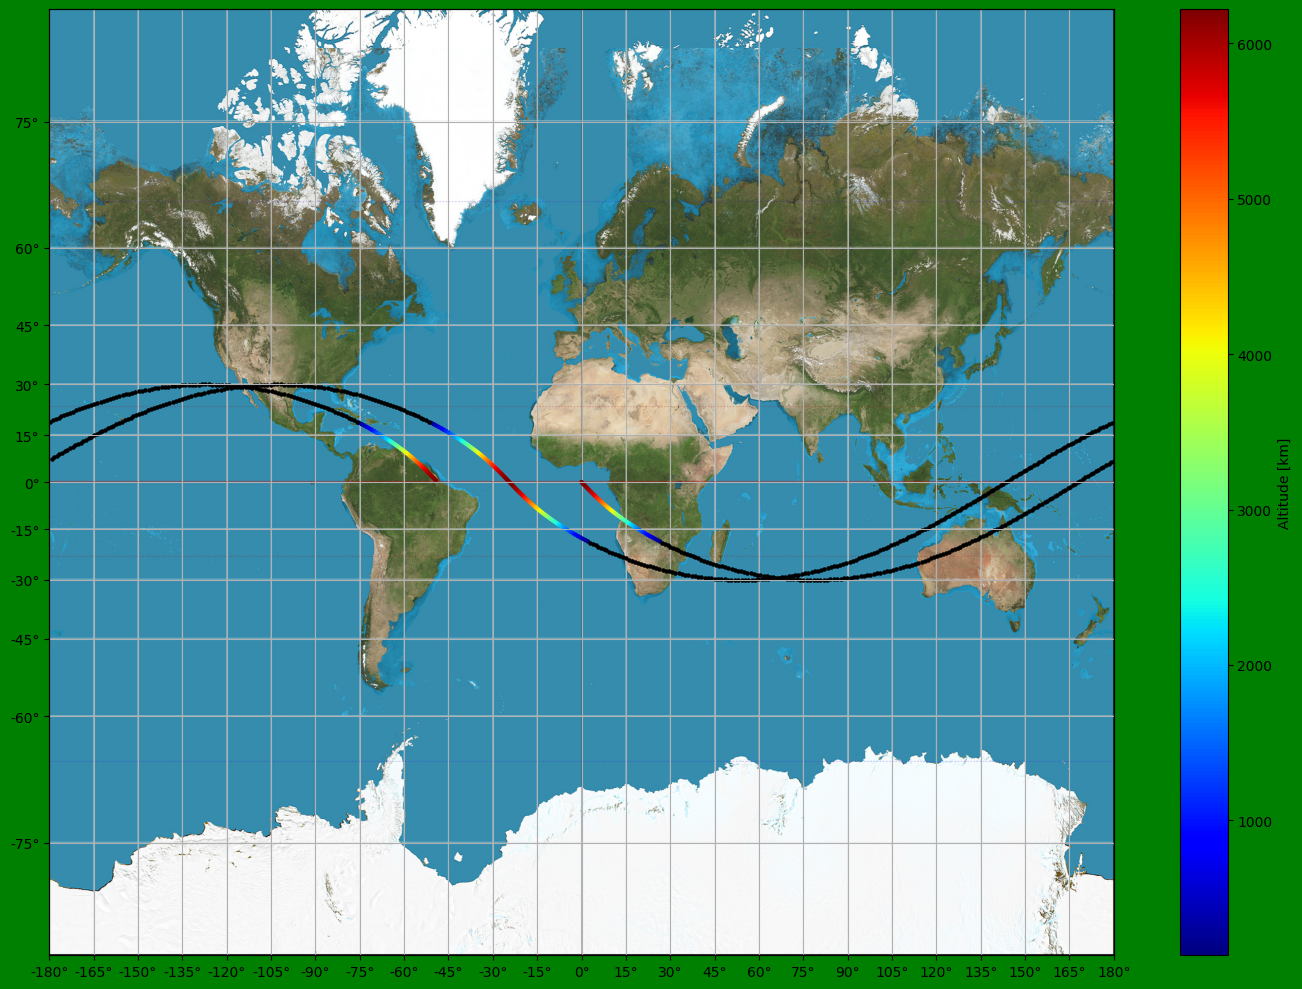

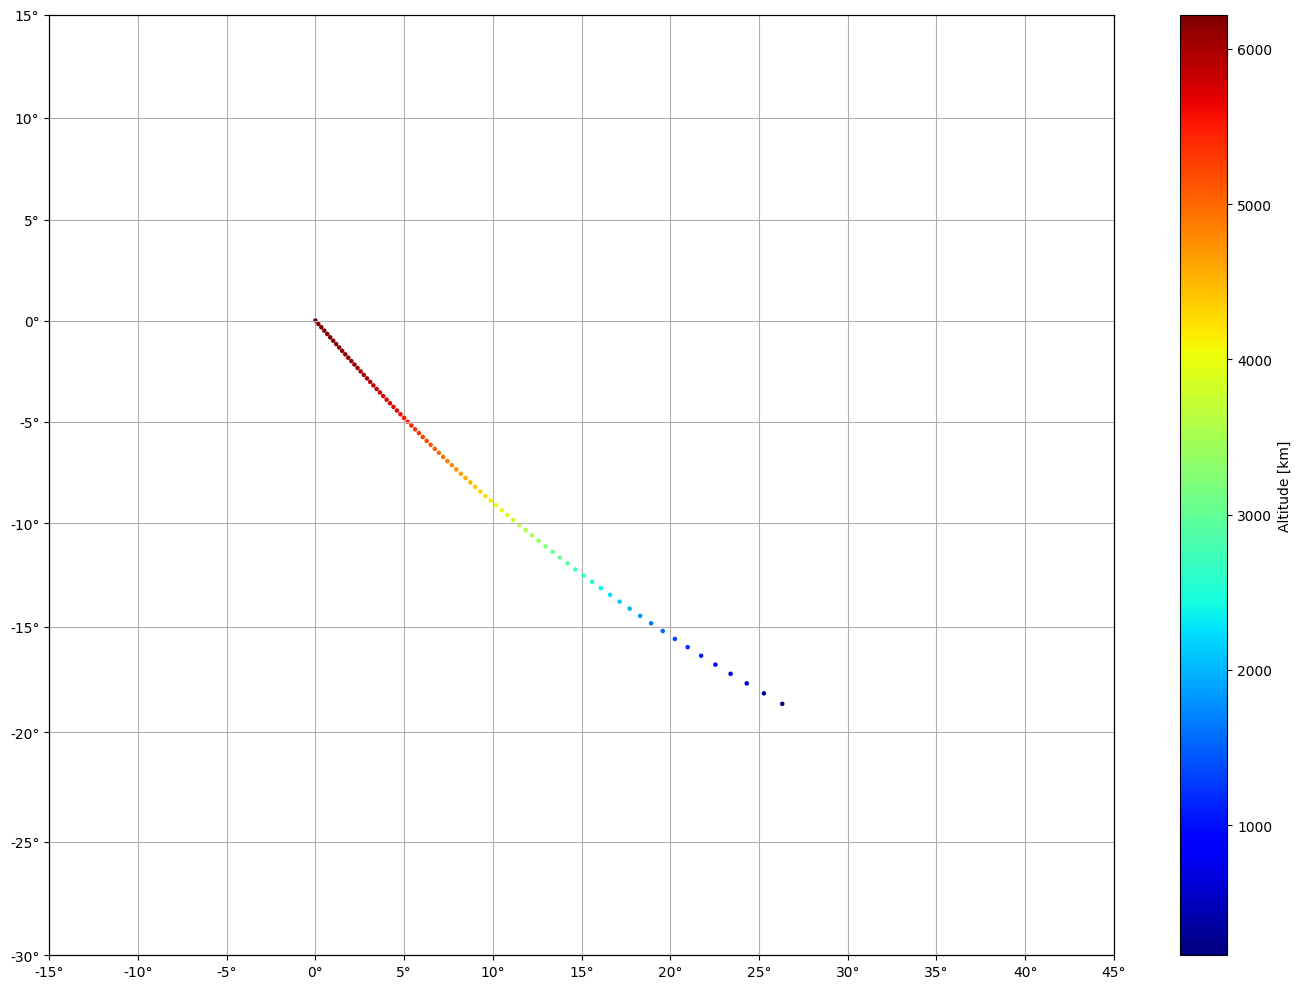

In [89]:
# from orbits import *
o1 = orbit(i=30,e=.8,f=180,Omega=180)
# space().plot_ground_track(o1,720,time=False,figsize=(14,10),facecolor='white',dpi=100)
space().plot_ground_track(o1,t=720,dt=1,time=False,alt=True,collide_end=False,savefig='test 01.pdf',figsize=(14,10),facecolor='g',dpi=100)
space().plot_ground_track(o1,t=o1.P,dt=o1.P/200,time=True,alt=True,collide_end=True,savefig='test 02.pdf',figsize=(14,10),facecolor='white',dpi=100,vbox=[[-15,-30],[45,15]],xgrid_step=5,ygrid_step=5)

R=[8000,0,0]
V=[0.1,-7,0]
o1 = orbit(R=R,V=V)
# o1 = orbit(a=8000,e=0,i=0,omega=70,f=33)
describe_orbit(o1)
# space().calc_rv(*o1.coe(),o1.mu)
space().calc_coe(*o1.rv(),o1.mu)

import pandas as pd
def describe_orbit(o1):
    print(pd.Series(o1.coe(),index=['a','e','i','Ω','ω','ν']),'\n')
    print(pd.DataFrame(list(o1.rv()),index=['R','V'],columns=['x','y','z']))

a    3239.112509
e       0.976902
i       4.783323
Ω      95.710593
ω     180.123661
ν     179.876339
dtype: float64 

       x        y    z
R -637.1  6371.00  0.0
V   -1.2    -0.01  0.1


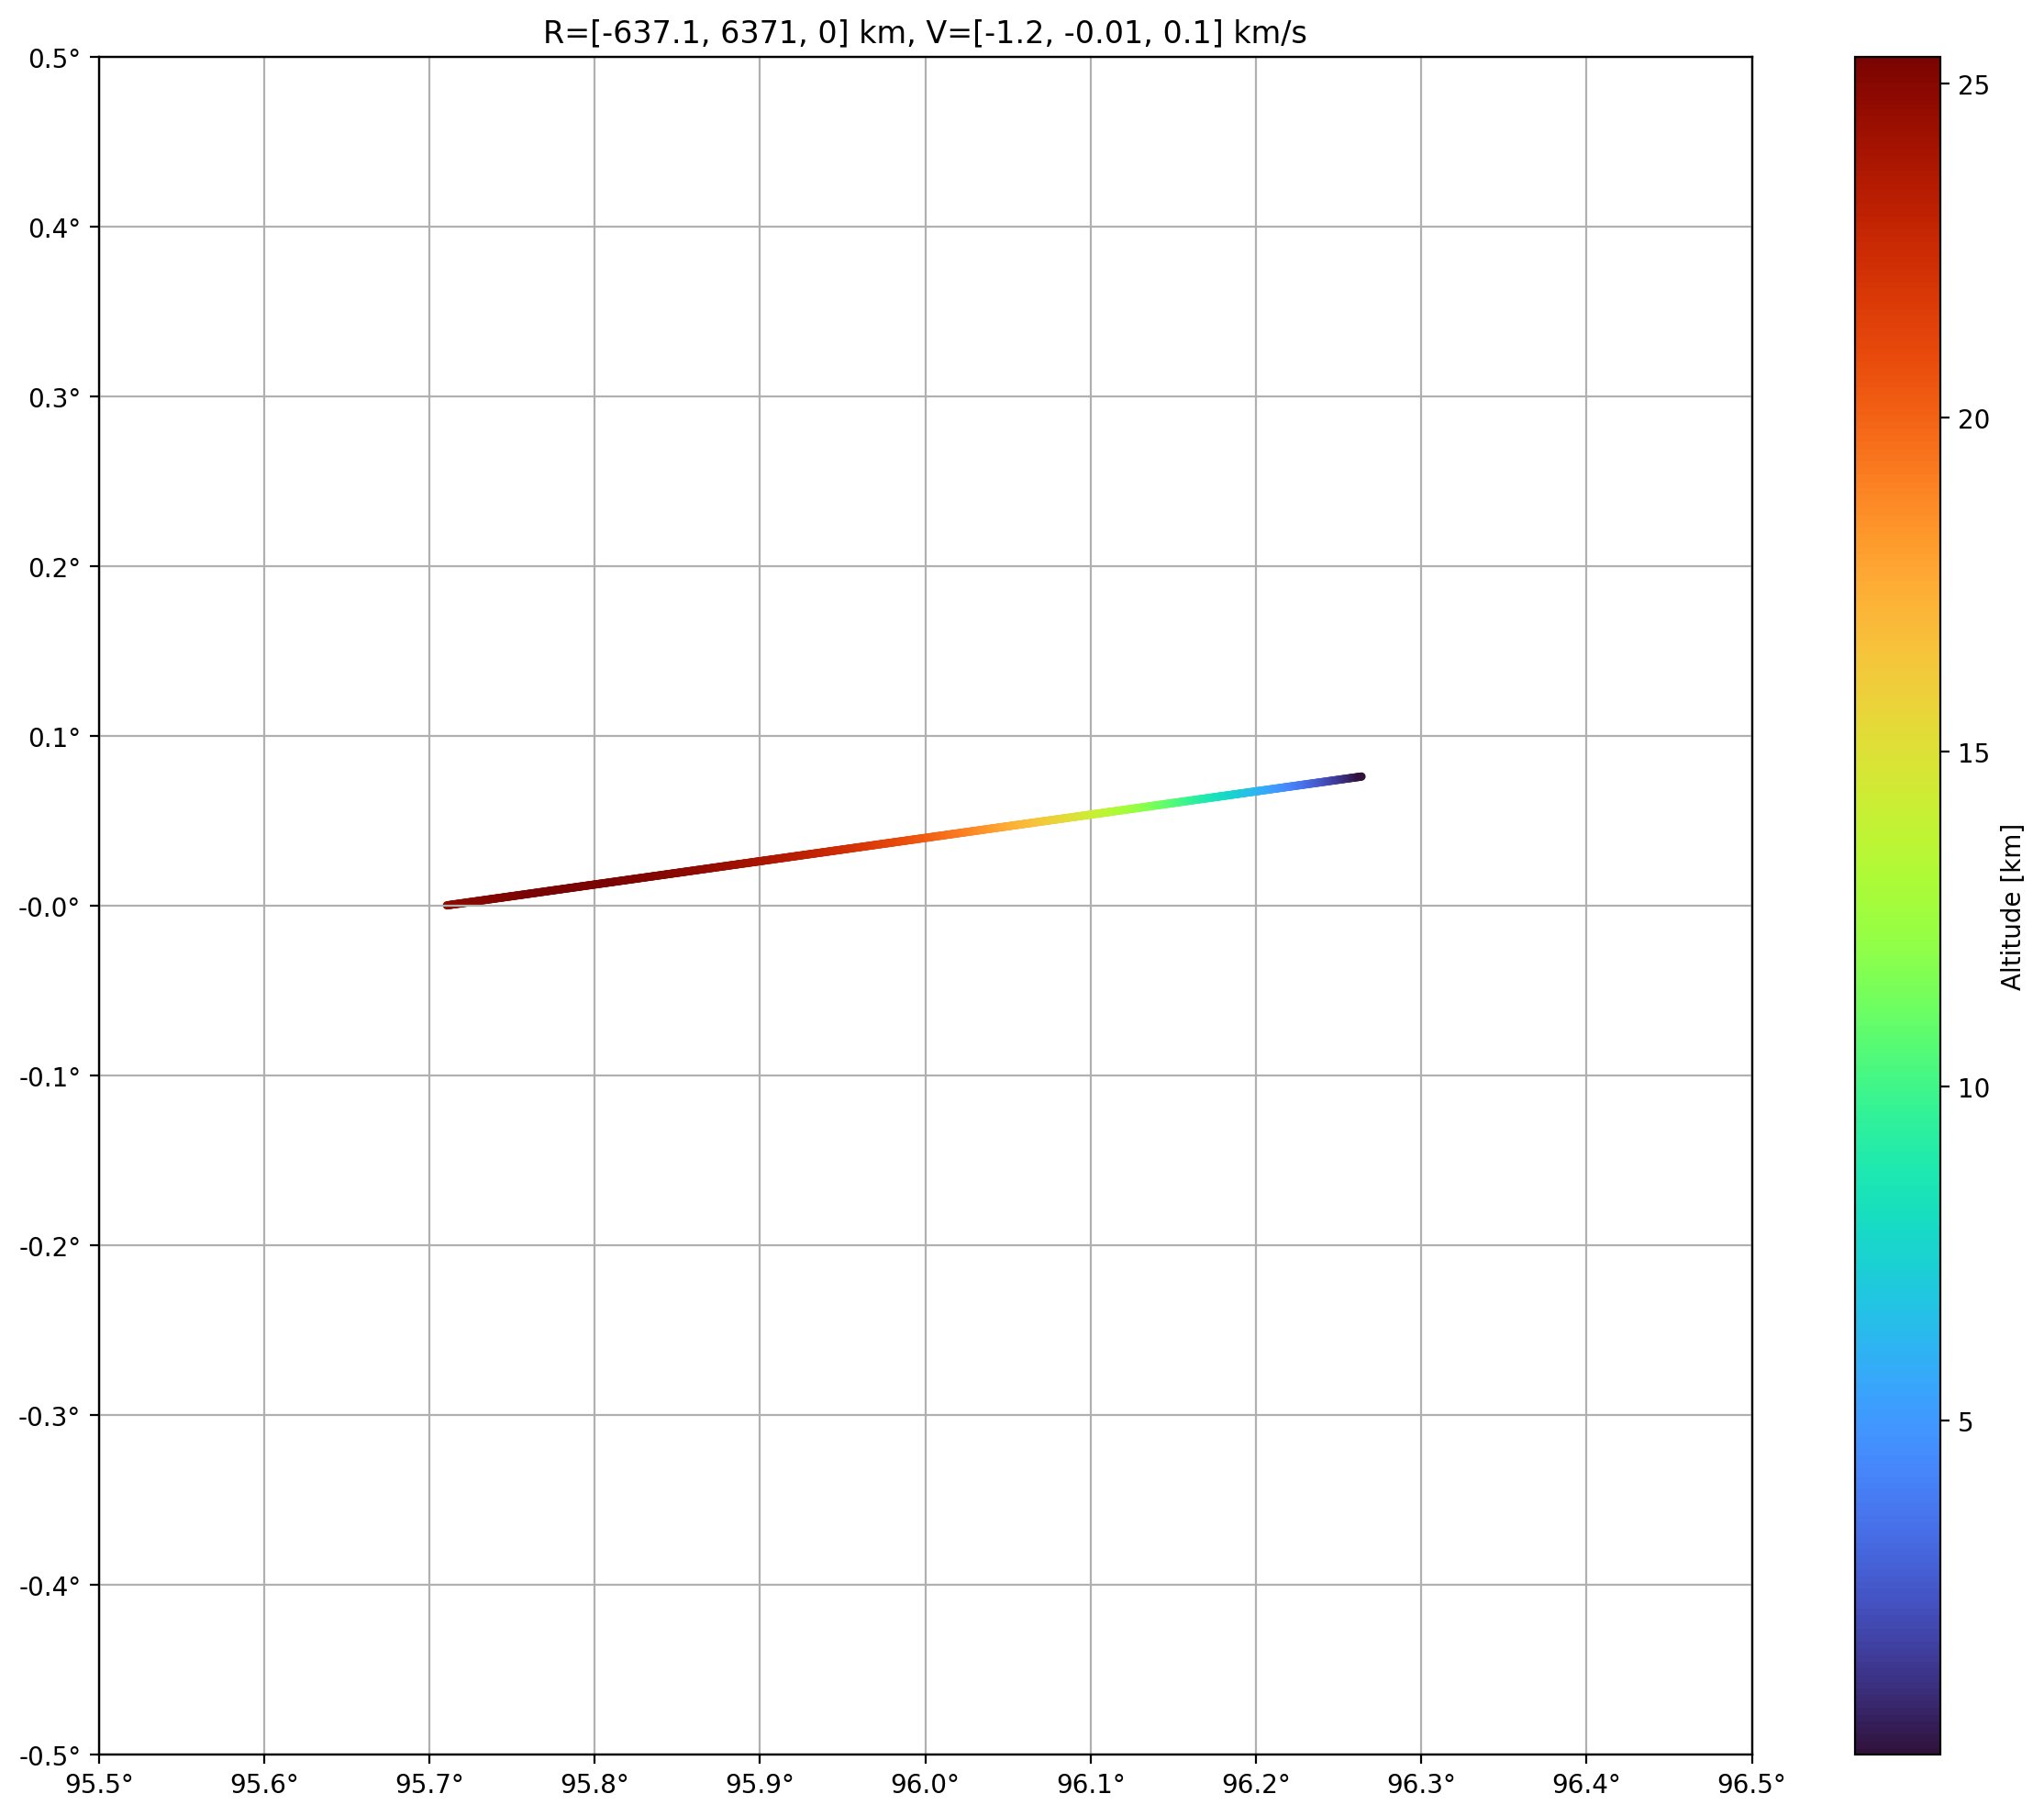

In [25]:
R=[-637.1,6371,0]
V=[-1.2,-0.01,0.1]
o1=orbit(R=R,V=V)
describe_orbit(o1)
space().plot_ground_track(o1,10,dt=.001,time=False,alt=True,collide_end=True,savefig="004.png",title=("R=%s km, V=%s km/s"%(o1.rv())),xgrid_step=.1,ygrid_step=.1,vbox=[[95.5,-.5],[96.5,.5]],cmap='turbo',figsize=(12,10),facecolor='white',dpi=200)

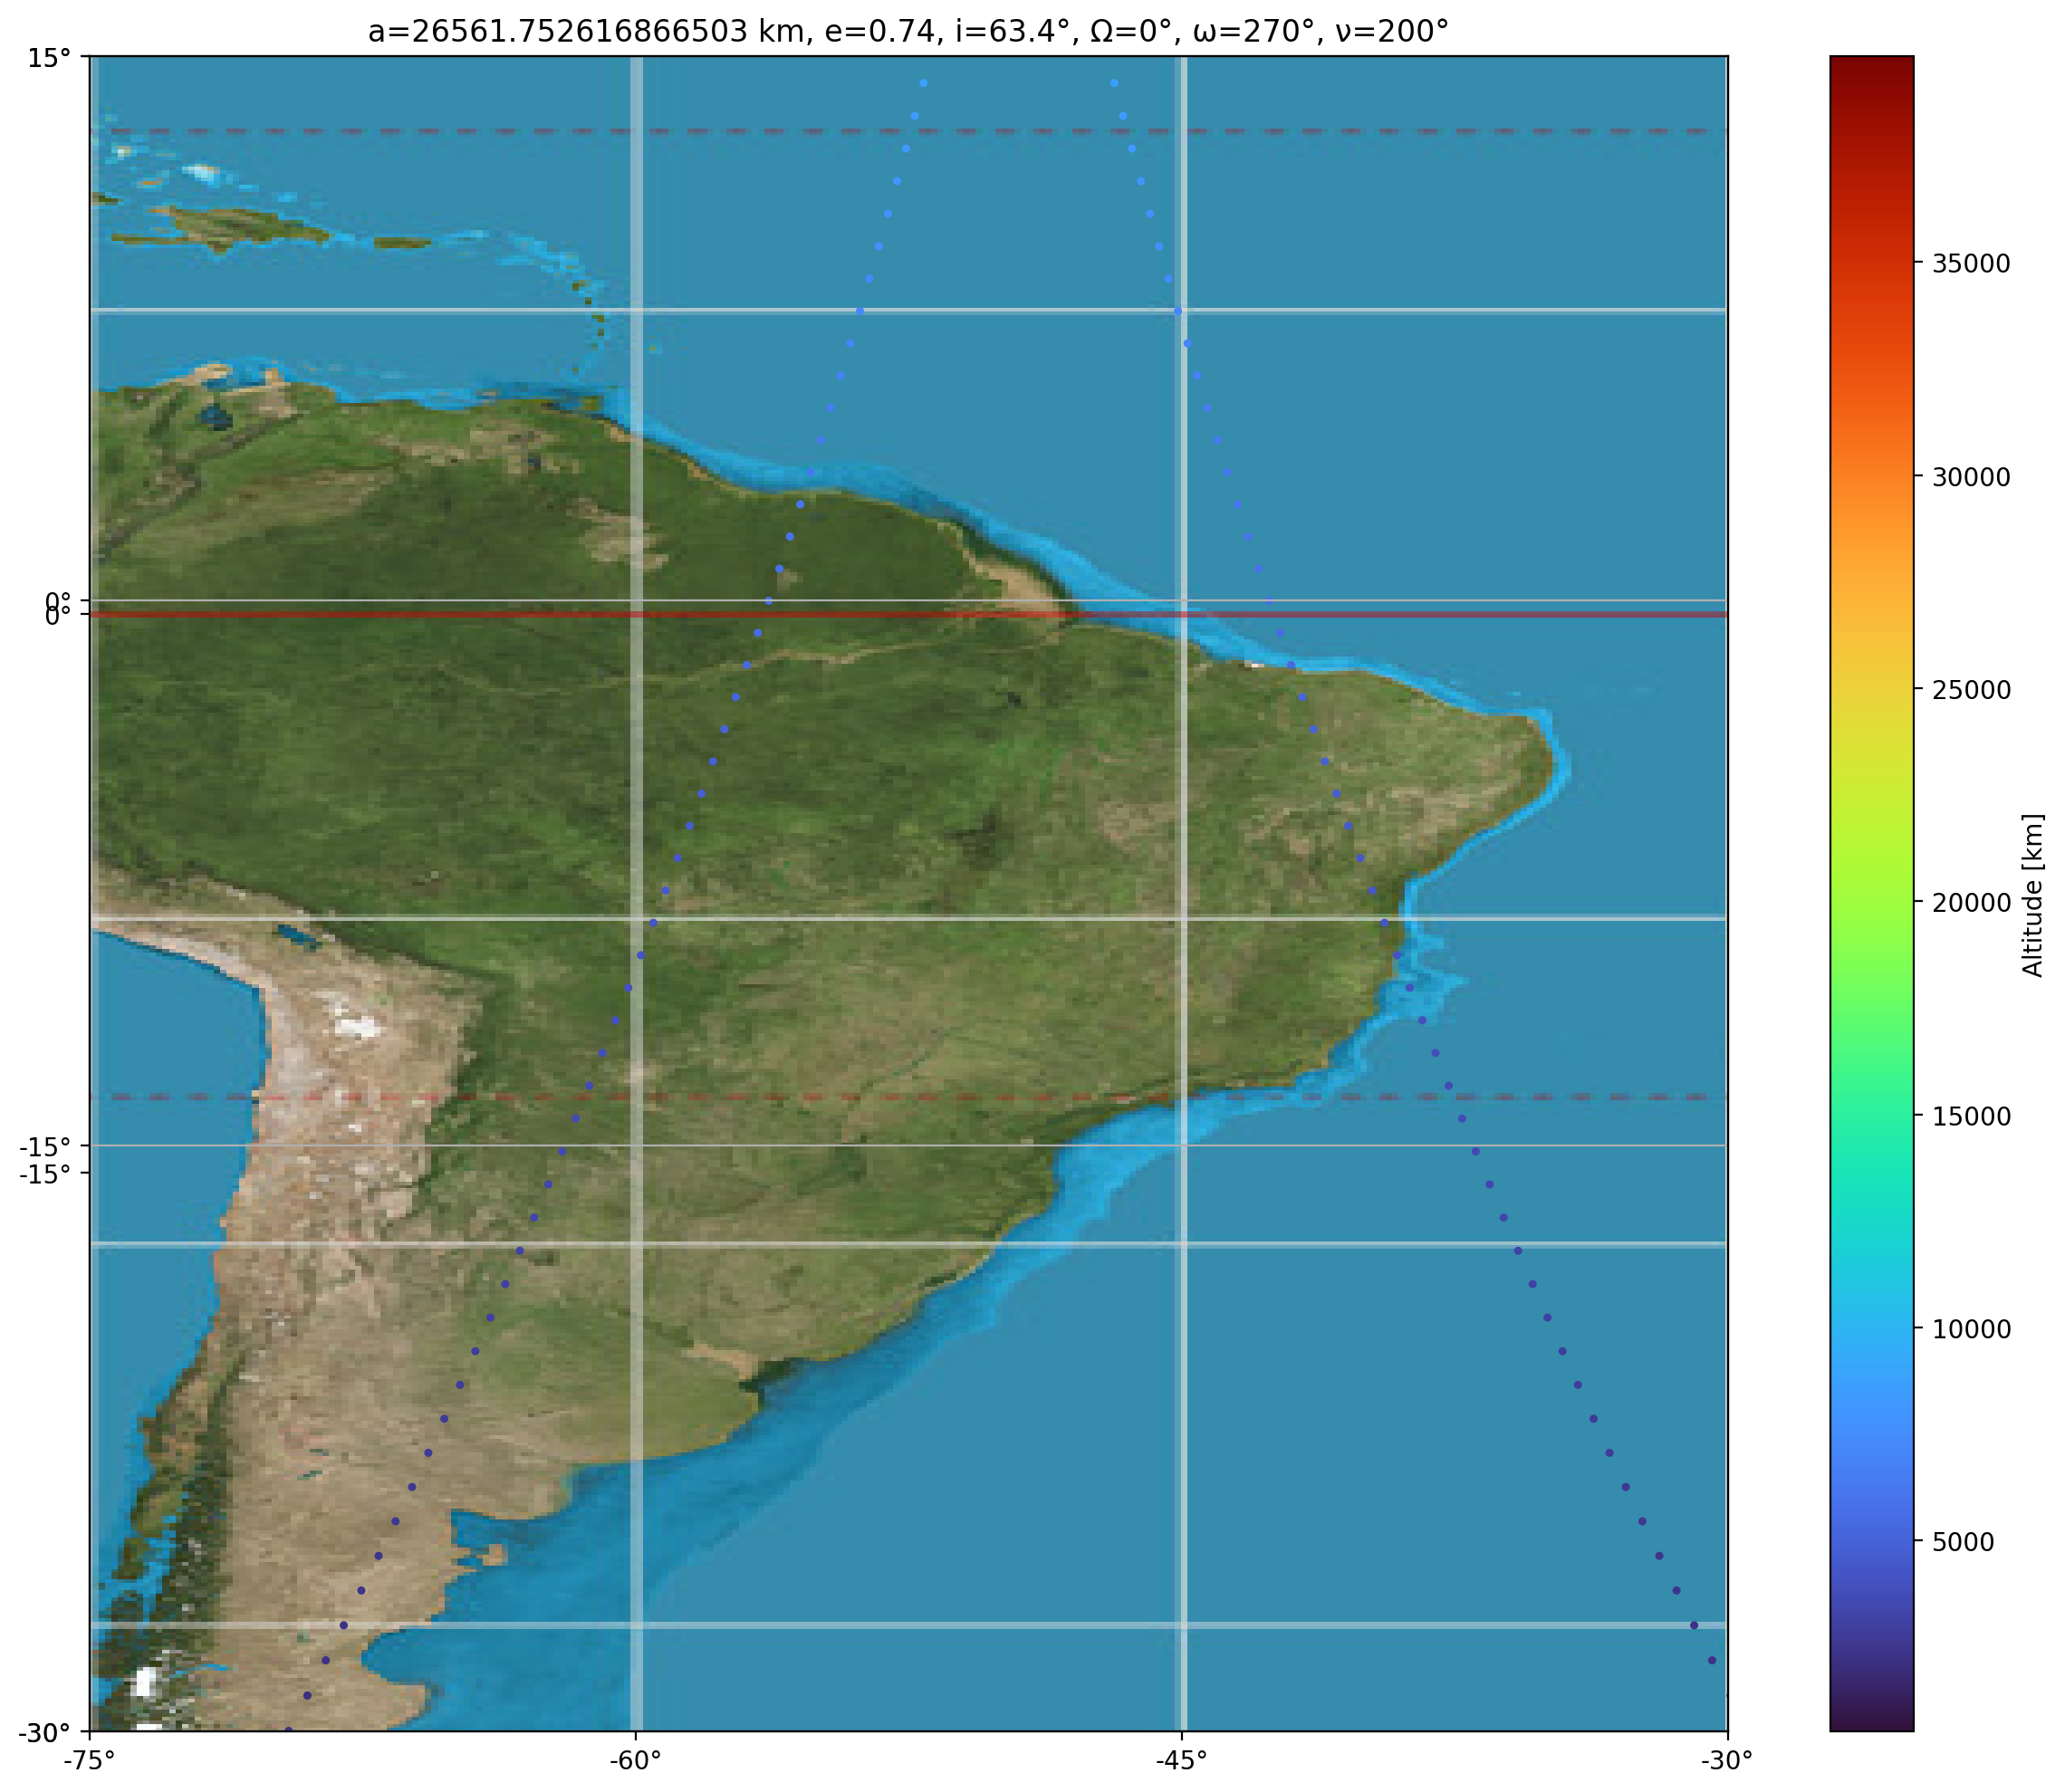

In [69]:
# o1=orbit(R=[37000,0,0],V=[1,1,1])
# R=[4332.657577125530, 2444.839647693530, -4643.332104432490]
# V=[-5.59420737756126, 4.29280613285082, -2.96089030542509]
# o1=orbit(R=R,V=V)
# o1 = orbit(a=22000,e=.5,i=45,Omega=0,omega=40,f=300)
# o1 = orbit(P=(86164.0905/2),e=.74,i=63.4,Omega=0,omega=270,f=200)
# lon,lat,r=space().ground_track_pos(o1,2*o1.P,dt=o1.P/200,time=True)
lon,lat,r=space().ground_track_pos(o1,720,dt=1,time=False)
R_earth=6378

lon_range=[-180,180]
lat_range=[-82,82]

lon_range=[-75,-30]
lat_range=[-30,15]

# lon_range=[95.5,96.5]
# lat_range=[-.5,.5]

fig = plt.figure(figsize=(12,10),facecolor='white',dpi=200)
ax = fig.add_subplot(111)
# img = mpimg.imread('https://upload.wikimedia.org/wikipedia/commons/f/f4/Mercator_projection_SW.jpg',format='jpg')
img = mpimg.imread('Earth mercator projection.jpg',format='jpg')


imgplot = ax.imshow(img, extent=(-181,181,np.deg2rad(-82.5),np.deg2rad(82.7)),aspect='auto')
# ax.set_ylim(-82,82)
ax.set_ylim((np.deg2rad(lat_range)))
# ax.yaxis.clear()
# ax.yaxis._visible=False
fmt = FuncFormatter(
    lambda x, pos=None: f"{np.degrees(x):.0f}\N{DEGREE SIGN}")
ax.yaxis.set(major_locator=FixedLocator(np.radians(np.arange(-90, 90, 15))),
         major_formatter=fmt, minor_formatter=fmt)
# ax.tick_params(left=False,labelleft=False)
# ax.grid(axis='x')
ax=ax.twinx()
ax.yaxis.tick_left()
ax.set_yscale('mercator')
ax.set_title('a=%s km, e=%s, i=%s°, Ω=%s°, ω=%s°, ν=%s°'%(o1.coe()))
# ax.set_title('R=%s km, V=%s km/s'%(o1.rv()))
scat = ax.scatter(lon[r>R_earth],np.deg2rad(lat[r>R_earth]),s=5,c=r[r>R_earth]-R_earth,cmap='turbo')
cbar = fig.colorbar(scat)
cbar.ax.set_ylabel('Altitude [km]')
ax.scatter(lon[r<R_earth],np.deg2rad(lat[r<R_earth]),s=5,c='black')
# ax.set_xlim(-180,180)
# ax.set_ylim(np.deg2rad(-82),np.deg2rad(82))
ax.set_xlim(lon_range)
ax.set_ylim((np.deg2rad(lat_range)))
ax.grid(axis='y')
fmt = FuncFormatter(
    lambda x, pos=None: f"{x:.0f}\N{DEGREE SIGN}")
ax.xaxis.set(major_locator=FixedLocator(np.arange(-180, 181, 15)),
                 major_formatter=fmt, minor_formatter=fmt)

fmt = FuncFormatter(
    lambda x, pos=None: f"{np.degrees(x):.0f}\N{DEGREE SIGN}")
ax.yaxis.set(major_locator=FixedLocator(np.radians(np.arange(-90, 90, 15))),
         major_formatter=fmt, minor_formatter=fmt)


fig.tight_layout()

# fig.savefig('test.png')

plt.show()

###### ---END OF IMPORTANT STUFF---

In [202]:
import random
# M= 1.987286314184265 
M= random.random()*2*np.pi
e= random.random()

M= 6.156794251231714
e= 0.9102098574723252

print('M=',M)
print('e=',e)

E=M
print((E-e*np.sin(E)-M)/(1-e*np.cos(E)))
for i in range(10):
    E-=(E-e*np.sin(E)-M)/(1-e*np.cos(E))
    print(i+1,':',E,(E-e*np.sin(E)-M)/(1-e*np.cos(E)))
    if i >= 6 and (E-e*np.sin(E)-M)/(1-e*np.cos(E)) != 0: raise Exception('More than 7 iterations needed')
    
print('E-e*np.sin(E)=',E-e*np.sin(E))

M= 6.156794251231714
e= 0.9102098574723252
1.1822316929010563
1 : 4.974562558330658 -0.3967126231765985
2 : 5.371275181507256 -0.14870982482846742
3 : 5.519985006335723 -0.022316432579129197
4 : 5.542301438914852 -0.00047337062751642747
5 : 5.542774809542369 -2.0975425559241464e-07
6 : 5.5427750192966245 -4.060671074445792e-14
7 : 5.542775019296665 0.0
8 : 5.542775019296665 0.0
9 : 5.542775019296665 0.0
10 : 5.542775019296665 0.0
E-e*np.sin(E)= 6.156794251231714


In [25]:
def hms(st):
    s=st%60
    st=st//60
    m=int(st%60)
    h=int(st//60)
    return h,m,s
    
o1=orbit(R=[7000,0,0],V=[1,1,1])
describe_orbit(o1)
print()
t=1201.5
print('\n%s seconds later:\n' %(t))
o2=o1.copy().update(f=space().predict(o1,t,False))
describe_orbit(o2)
print('|v|',norm(o2.V))
print("%sh %smin %ssec" %(hms(o1.P)))
print(o1.P)

a    3594.692090
e       0.965197
i      45.000000
Ω       0.000000
ω     181.474452
ν     178.525548
dtype: float64 

      x  y  z
R  7000  0  0
V     1  1  1


1201.5 seconds later:

a    3594.692090
e       0.965197
i      45.000000
Ω       0.000000
ω     181.474452
ν       4.300917
dtype: float64 

            x          y          z
R -124.644692  -8.914361  -8.914361
V    5.051778 -55.798338 -55.798338
|v| 79.0723054452168
0h 35min 44.88378058960734sec
2144.8837805896073
